In [1]:
## packages for data table processing 
library(here)
library(tidyverse)

## main Seurat package snRNA-seq pacakges
library(Seurat)
library(SeuratDisk)
library(future)

ss <- function(x, pattern, slot = 1, ...) { 
  sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

Warning message:
“package ‘here’ was built under R version 4.1.3”
here() starts at /projects/pfenninggroup/singleCell/McLean_chronic_opioid_monkey_snRNA-seq

Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tibble’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.3”
Warning message:
“package ‘readr’ was built under R version 4.1.3”
Warning message:
“package ‘purrr’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
Warning message:
“package ‘stringr’ was built under R version 4.1.3”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── 

In [2]:
#######################################################
# 0) Seurat uses the future package for parallelization
## set to be parallel over 12 cores
plan("multicore", workers = 12)
options(future.globals.maxSize = 40 * 1024^3)
options(future.rng.onMisuse = 'ignore')

In [3]:
##################################################
# 1) load in cell type labels for label transfer
## read in Logan BU snRNA dataset for label refinement
save_merged_fn = here('data/tidy_data/Seurat_projects', 
                        "McLean_chronic_opioid_monkey_filtered_SCT_SeuratObj_N16.h5Seurat")
obj_merged = save_merged_fn %>% LoadH5Seurat() 


## read in the MSN dataset for label refinement
save_subset_msn = here('data/tidy_data/Seurat_projects', 
                        "McLean_chronic_opioid_monkey_subsetMSN_SCT_SeuratObj_N16.h5Seurat")
obj_msn = save_subset_msn %>% LoadH5Seurat()

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Initializing SCT with data

Adding counts for SCT

Adding scale.data for SCT

Adding miscellaneous information for SCT

Initializing alra with data

Adding miscellaneous information for alra

Initializing integrated with data

Adding scale.data for integrated

Adding variable feature information for integrated

Adding miscellaneous information for integrated

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding graph integrated_nn

Adding graph integrated_snn

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results

Adding data that was not associated with an assay

Warning message:
“Adding a command log without an assay associa

In [4]:
###########################
# 2) Refine the MSN labels

## redo the clustering for the MSNs
obj_msn <- obj_msn %>% FindClusters(resolution = 1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7216
Number of edges: 441717

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7604
Number of communities: 11
Elapsed time: 1 seconds


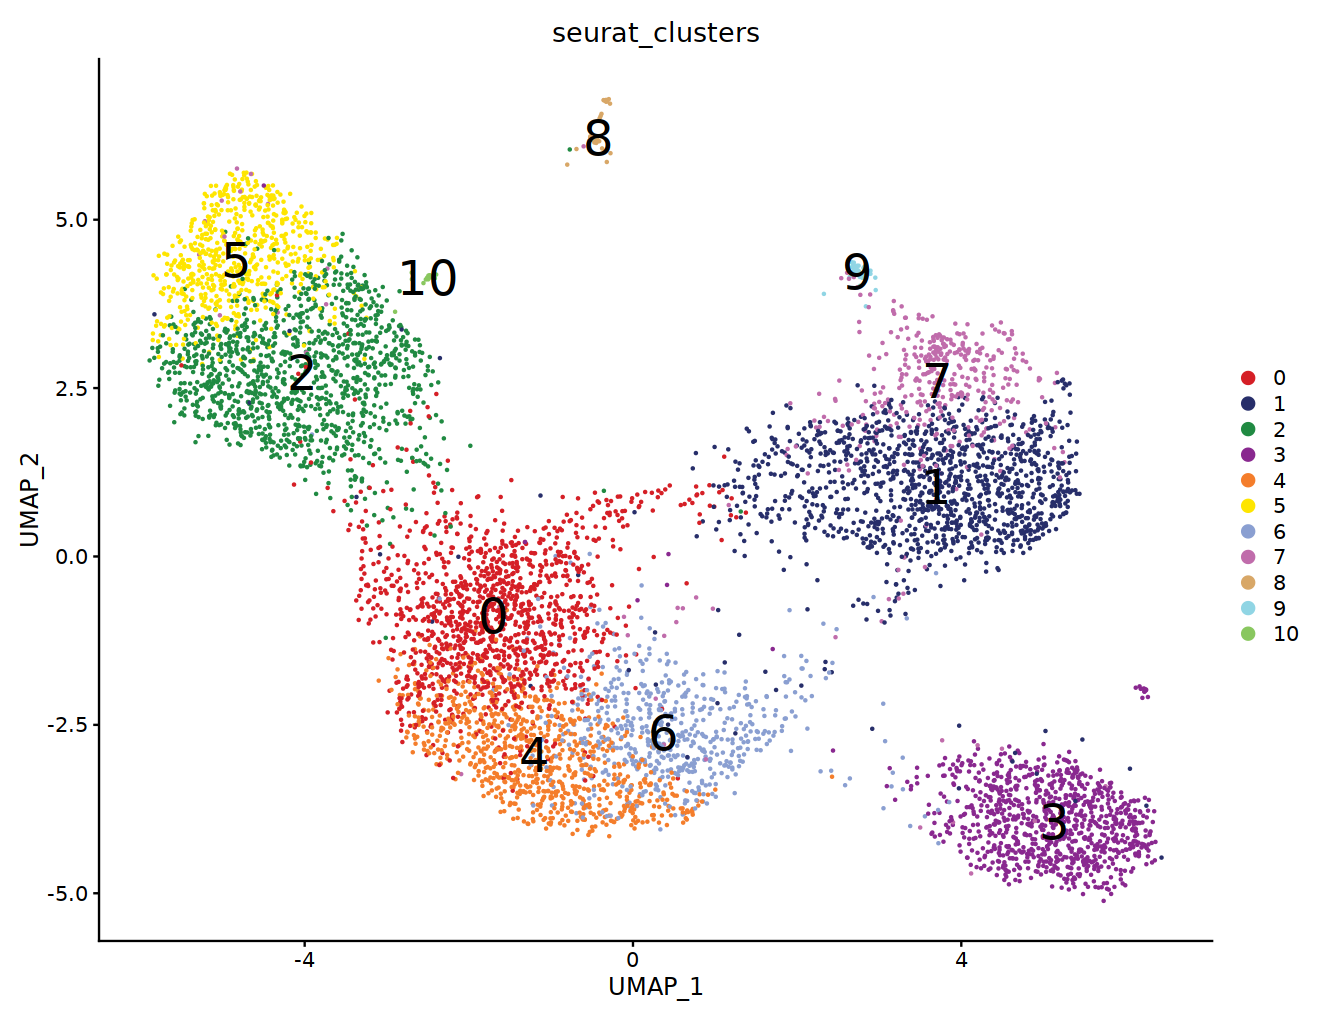

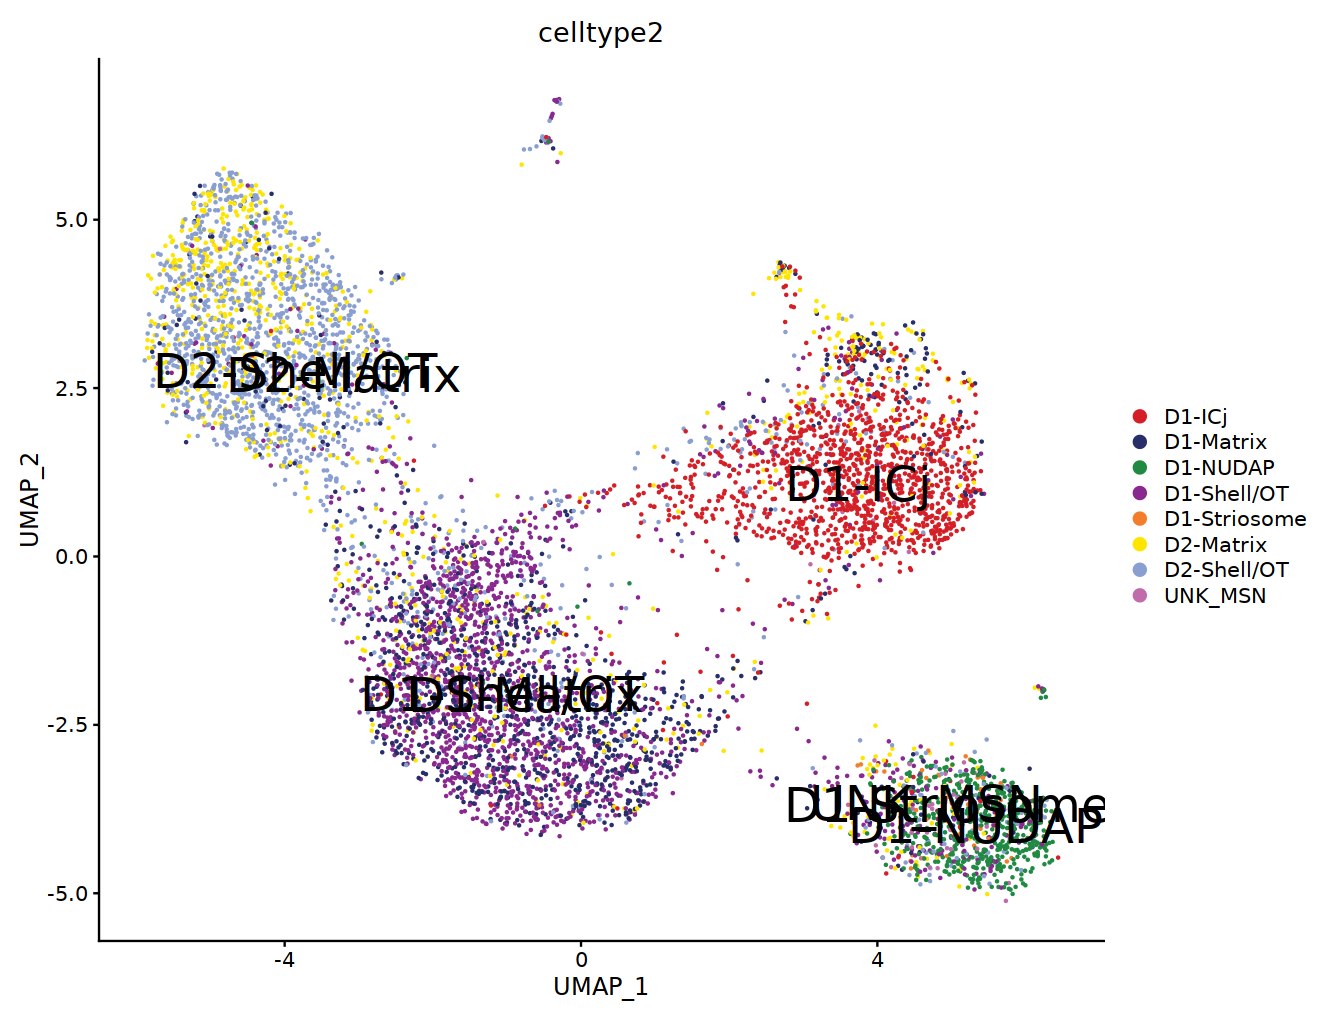

In [5]:
## plot the MSN sublabel
DimPlot(obj_msn, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 10, 
        cols = ArchR::paletteDiscrete(unique(obj_msn$seurat_clusters)))
DimPlot(obj_msn, reduction = "umap", group.by = "celltype2", label = TRUE, label.size = 10, 
                cols = ArchR::paletteDiscrete(unique(obj_msn$celltype2)))

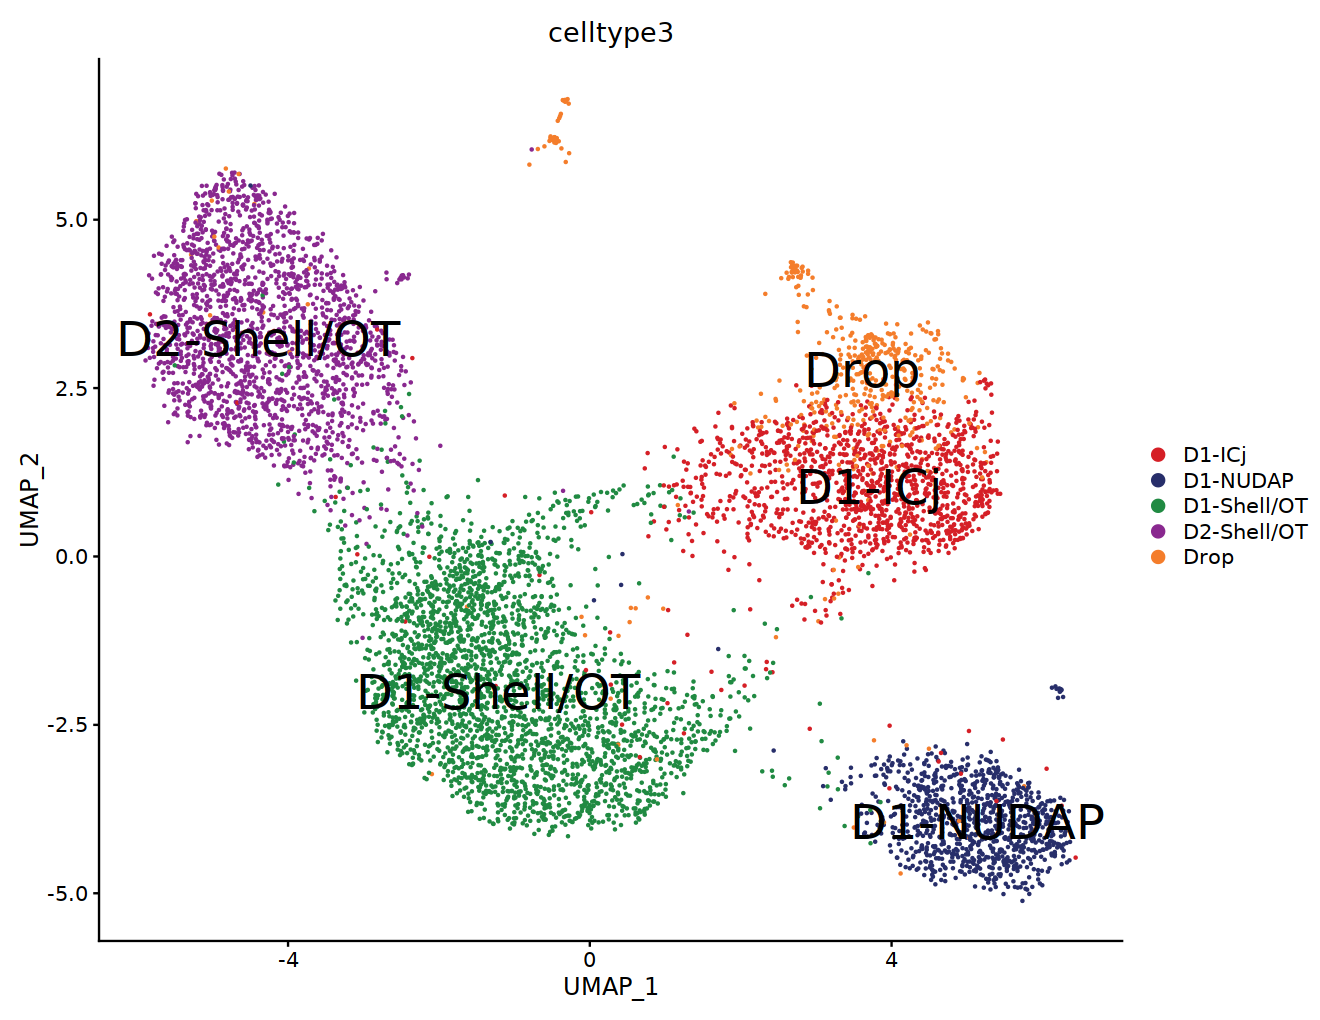

In [6]:
## using the UMAP embedding and majority clusters, relabel the MSN subtypes
obj_msn@meta.data$celltype3 = obj_msn$celltype2

## the bad cluster
obj_msn@meta.data$celltype3[obj_msn$seurat_clusters %in% c(7:9)] = 'Drop'

## the canonical clusters are D1 or D2 Shell/OT
obj_msn@meta.data$celltype3[obj_msn$seurat_clusters %in% c(0,4,6)] = 'D1-Shell/OT'
obj_msn@meta.data$celltype3[obj_msn$seurat_clusters %in% c(2,5,10)] = 'D2-Shell/OT'

## special child
obj_msn@meta.data$celltype3[obj_msn$seurat_clusters %in% c(3)] = 'D1-NUDAP'
obj_msn@meta.data$celltype3[obj_msn$seurat_clusters %in% c(1)] = 'D1-ICj'

## visualize the cluster assignments
DimPlot(obj_msn, reduction = "umap", group.by = "celltype3", label = TRUE, label.size = 10, 
                cols = ArchR::paletteDiscrete(unique(obj_msn$celltype3)))

In [7]:
##################################
# 3) Refine the remaining labels

## redo the clustering for the full data
obj_merged <- obj_merged %>% FindClusters(resolution = 2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22918
Number of edges: 1423132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8569
Number of communities: 39
Elapsed time: 5 seconds


Length of unique values greater than palette, interpolating..



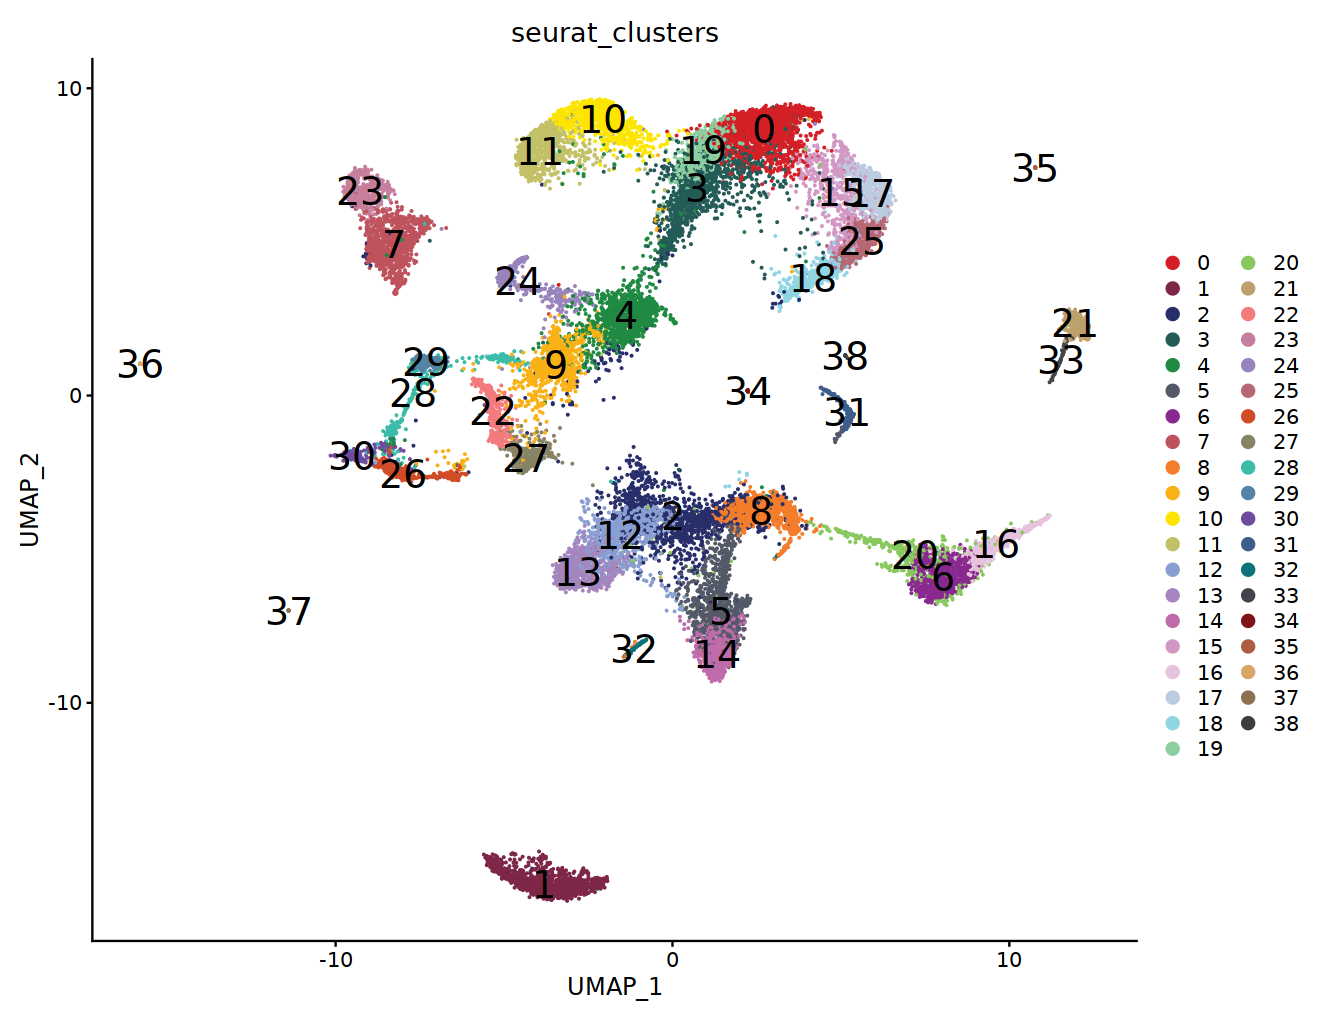

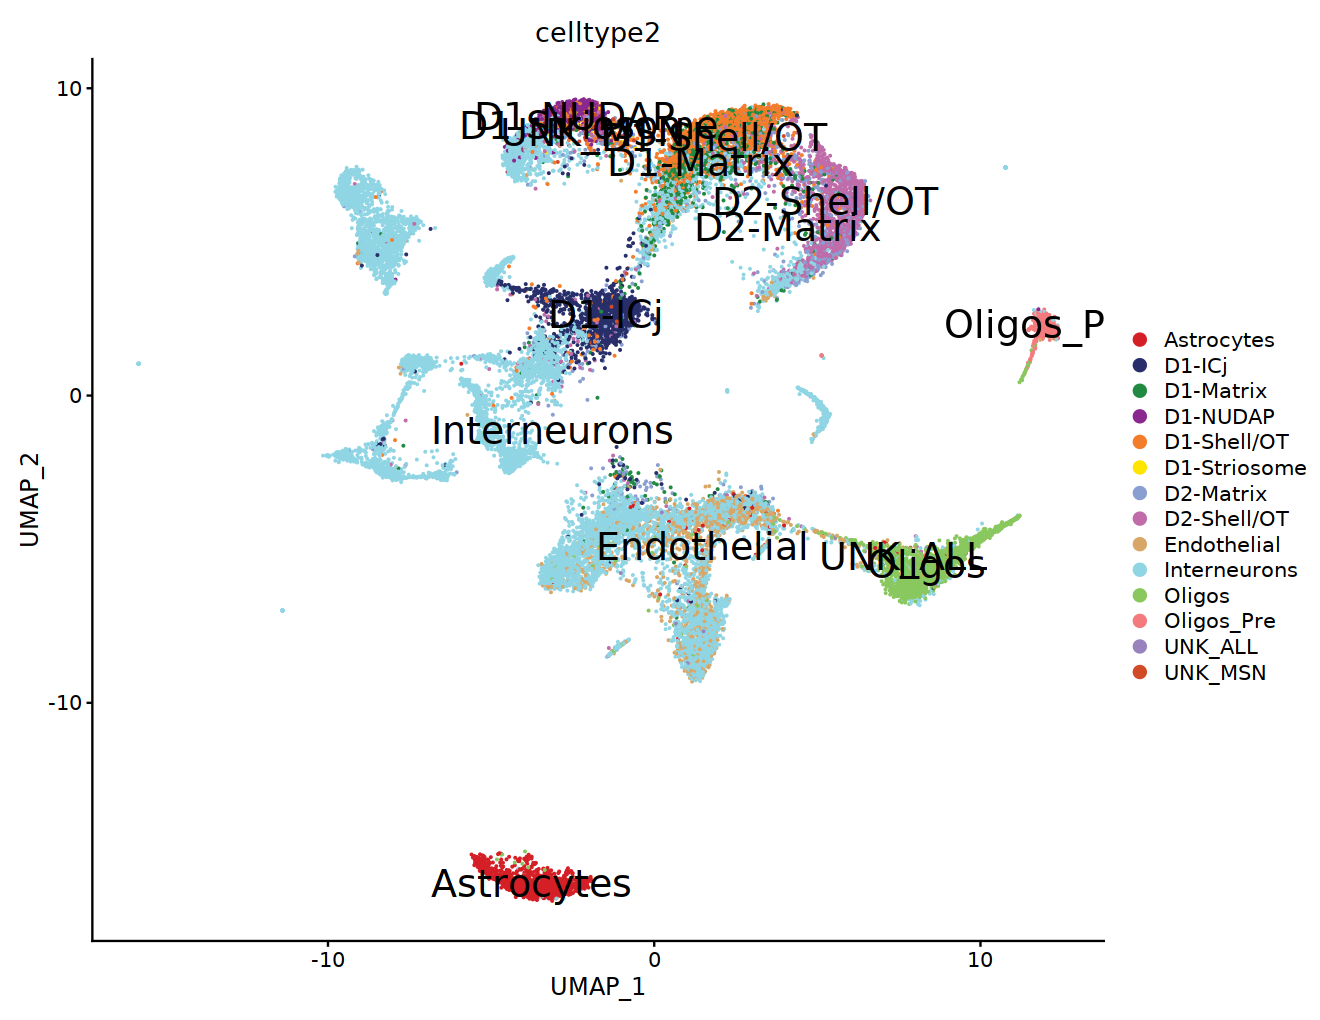

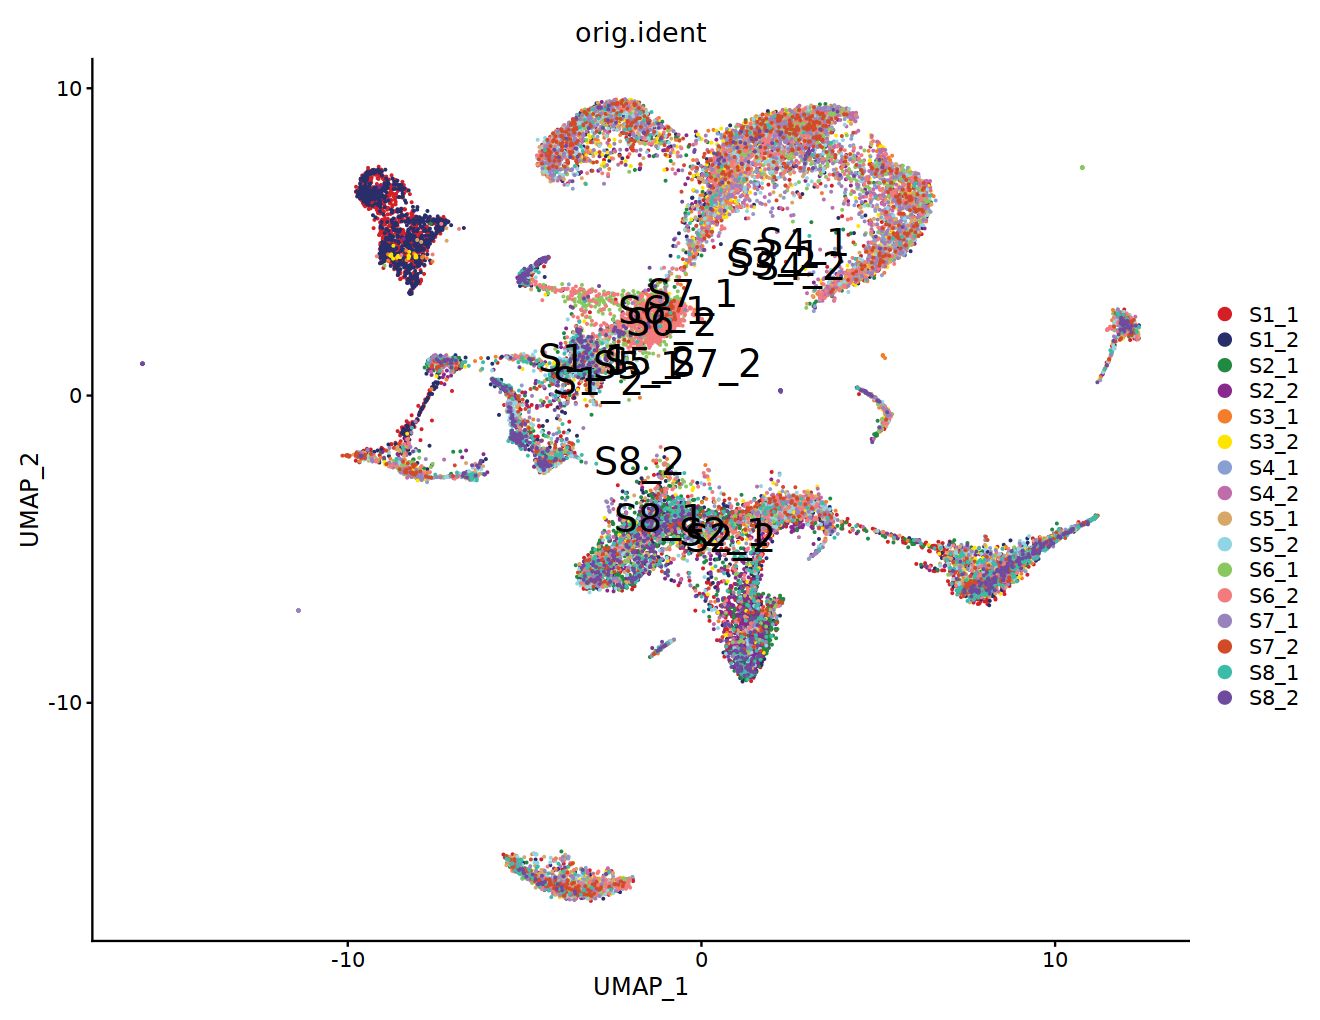

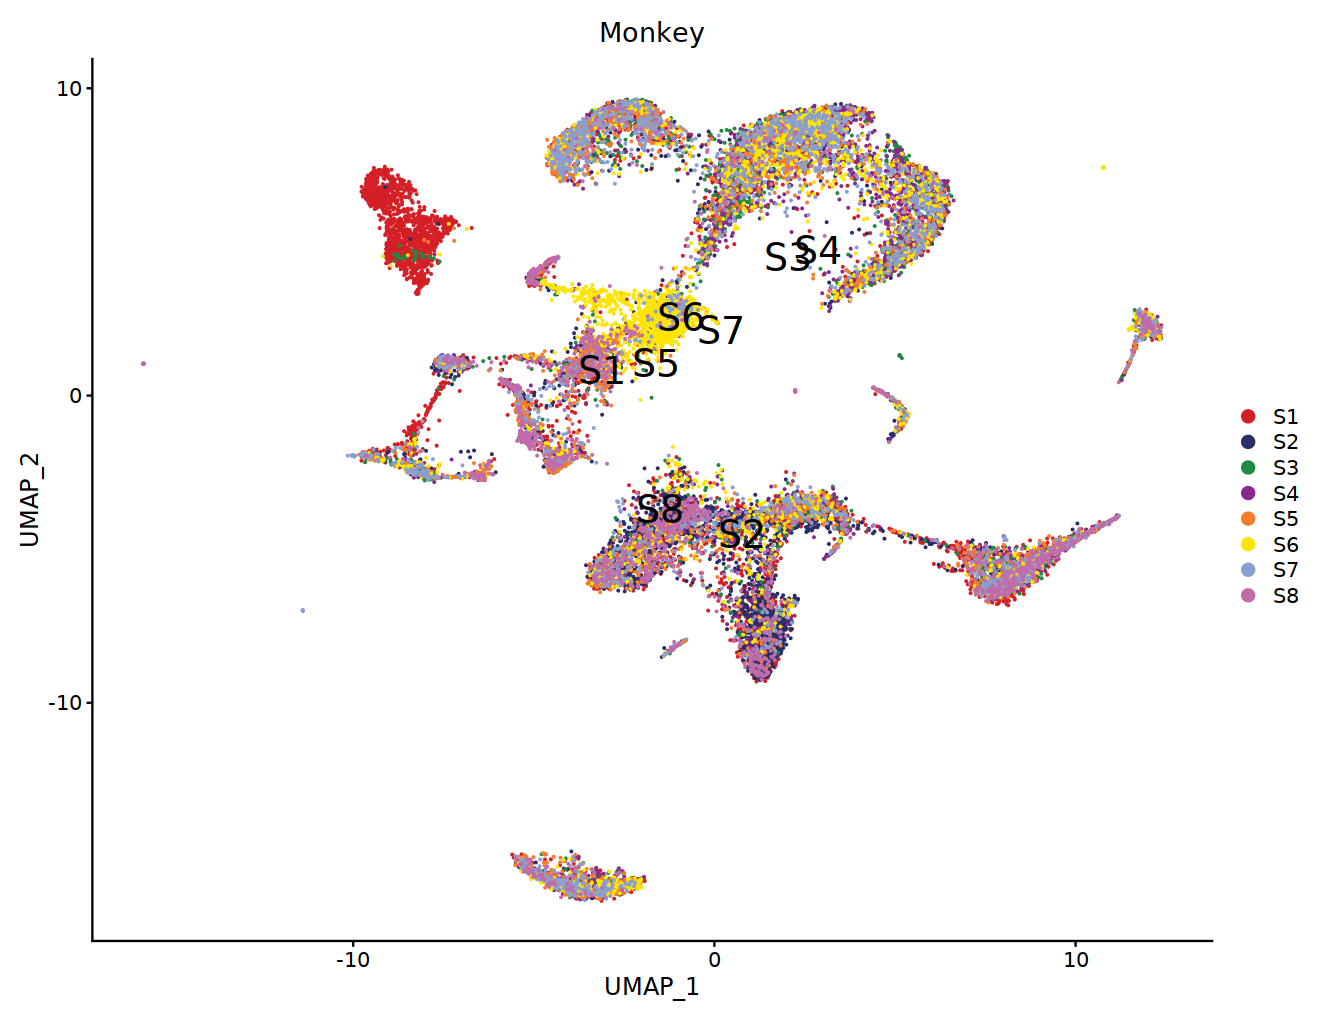

In [8]:
## plot the full dataset
DimPlot(obj_merged, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 8, 
        cols = ArchR::paletteDiscrete(unique(obj_merged$seurat_clusters)))
DimPlot(obj_merged, reduction = "umap", group.by = "celltype2", label = TRUE, label.size = 8, 
                cols = ArchR::paletteDiscrete(unique(obj_merged$celltype2)))
DimPlot(obj_merged, reduction = "umap", group.by = "orig.ident", label = TRUE, label.size = 8, 
                cols = ArchR::paletteDiscrete(unique(obj_merged$orig.ident)))
DimPlot(obj_merged, reduction = "umap", group.by = "Monkey", label = TRUE, label.size = 8, 
                cols = ArchR::paletteDiscrete(unique(obj_merged$Monkey)))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


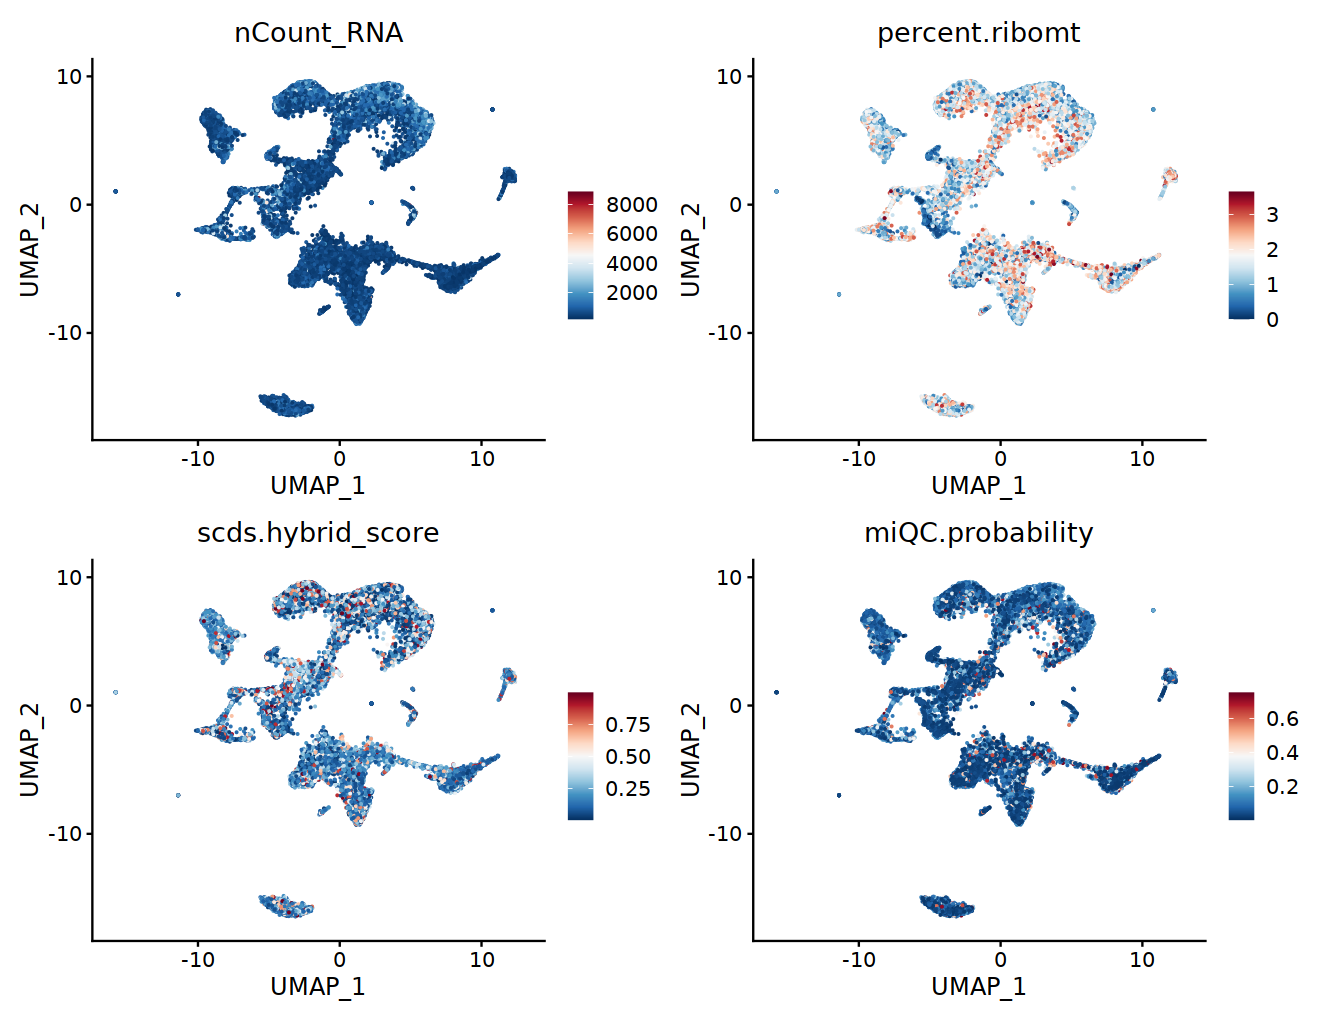

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


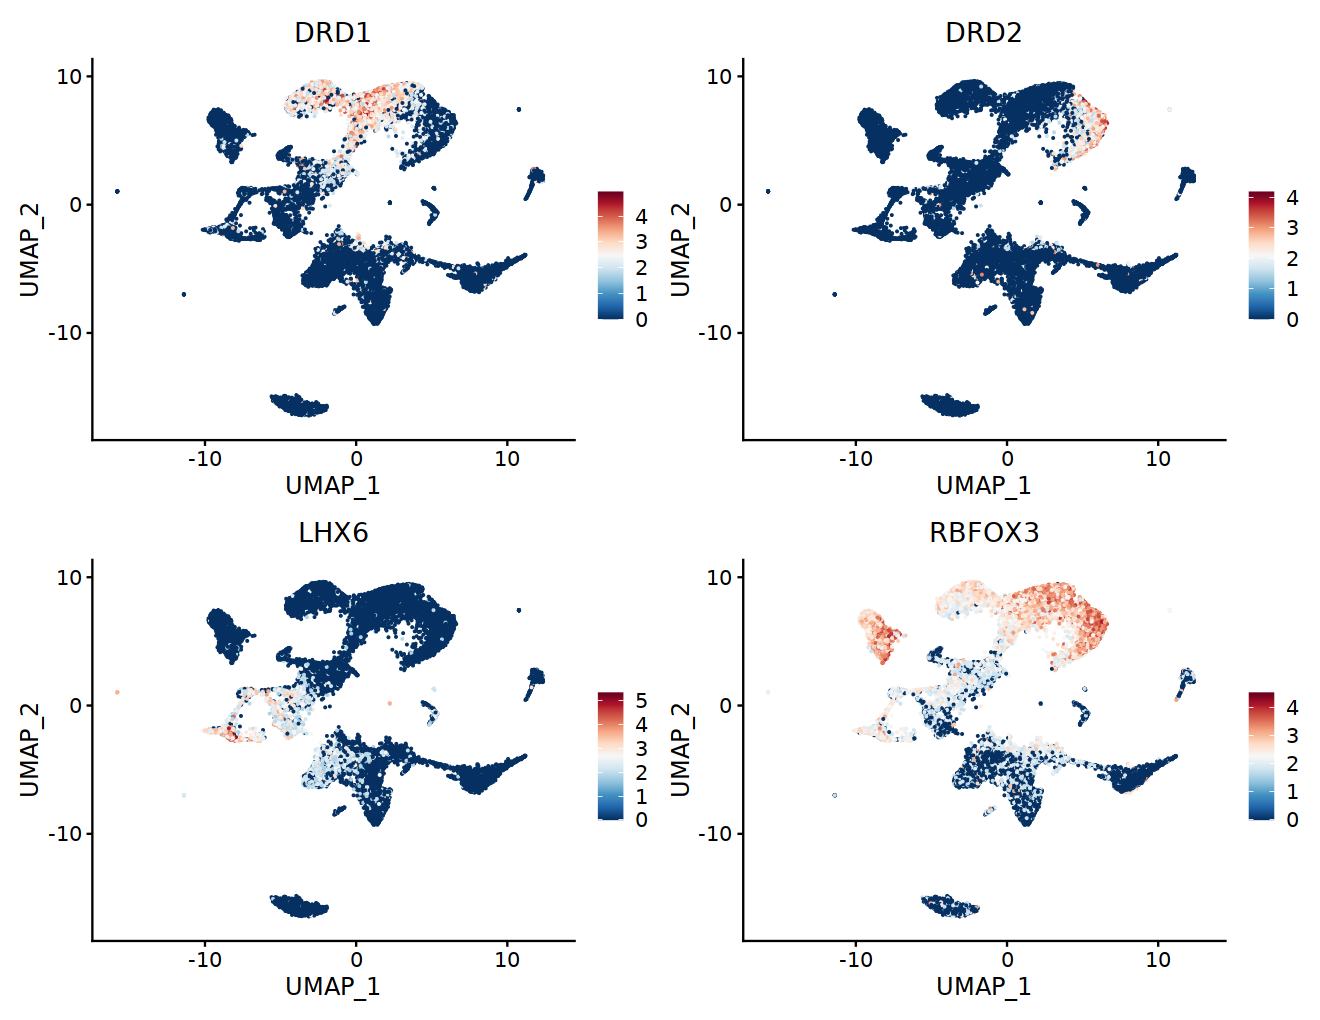

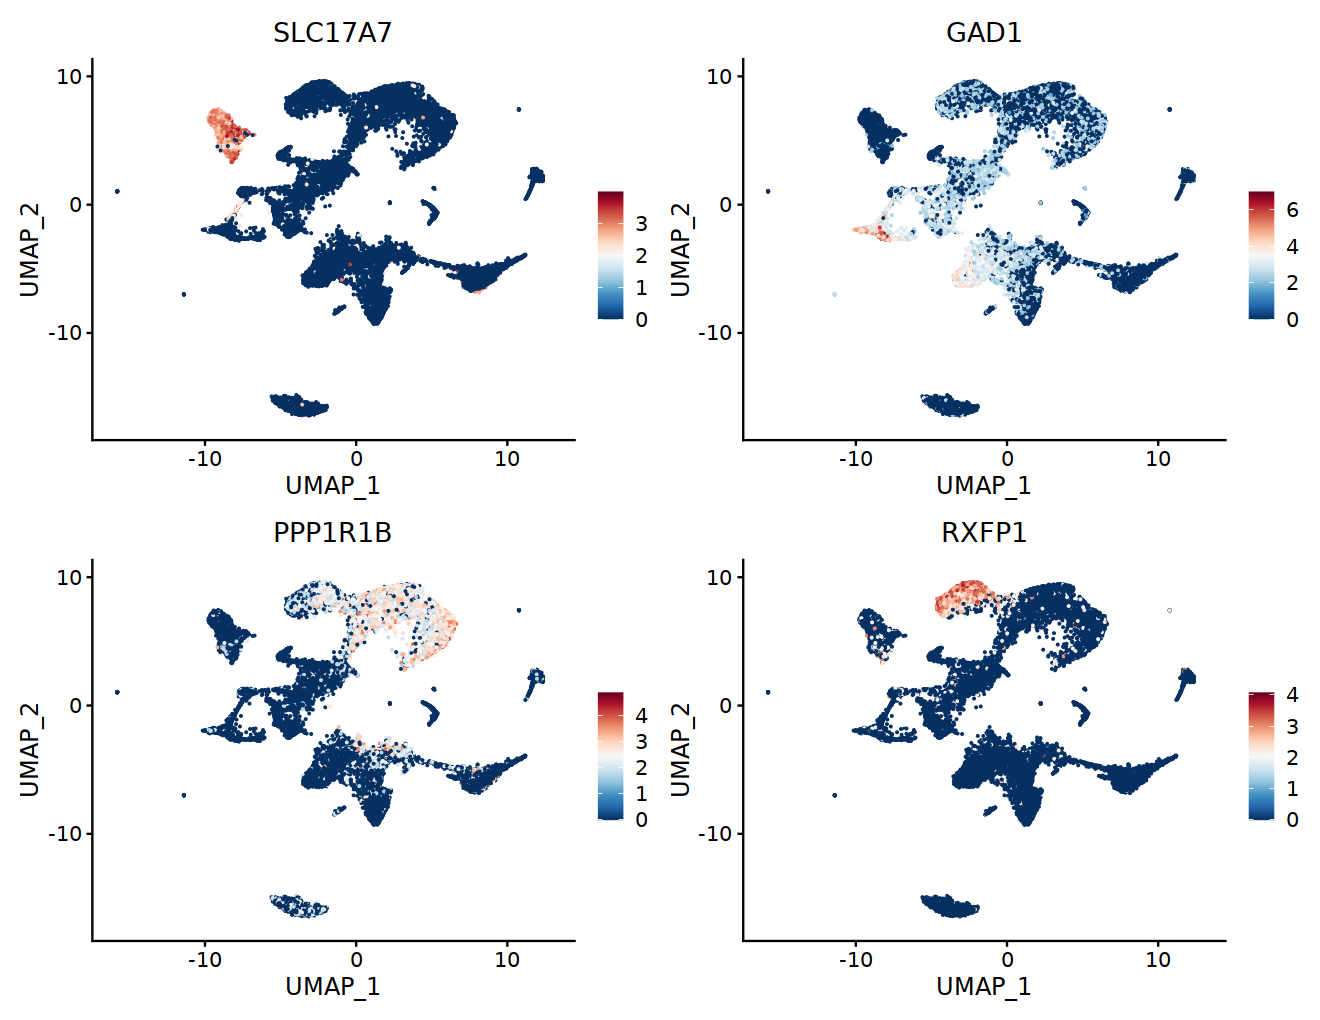

In [9]:
DefaultAssay(obj_merged) <- 'alra'

## plot the QC metrics to identify clusters that dominate by low QC
FeaturePlot(object = obj_merged, features = c('nCount_RNA', 'percent.ribomt', 'scds.hybrid_score','miQC.probability' ))& 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

FeaturePlot(object = obj_merged, features = c('DRD1', 'DRD2', 'LHX6', 'RBFOX3')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

FeaturePlot(object = obj_merged, features = c('SLC17A7', 'GAD1', 'PPP1R1B', 'RXFP1')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


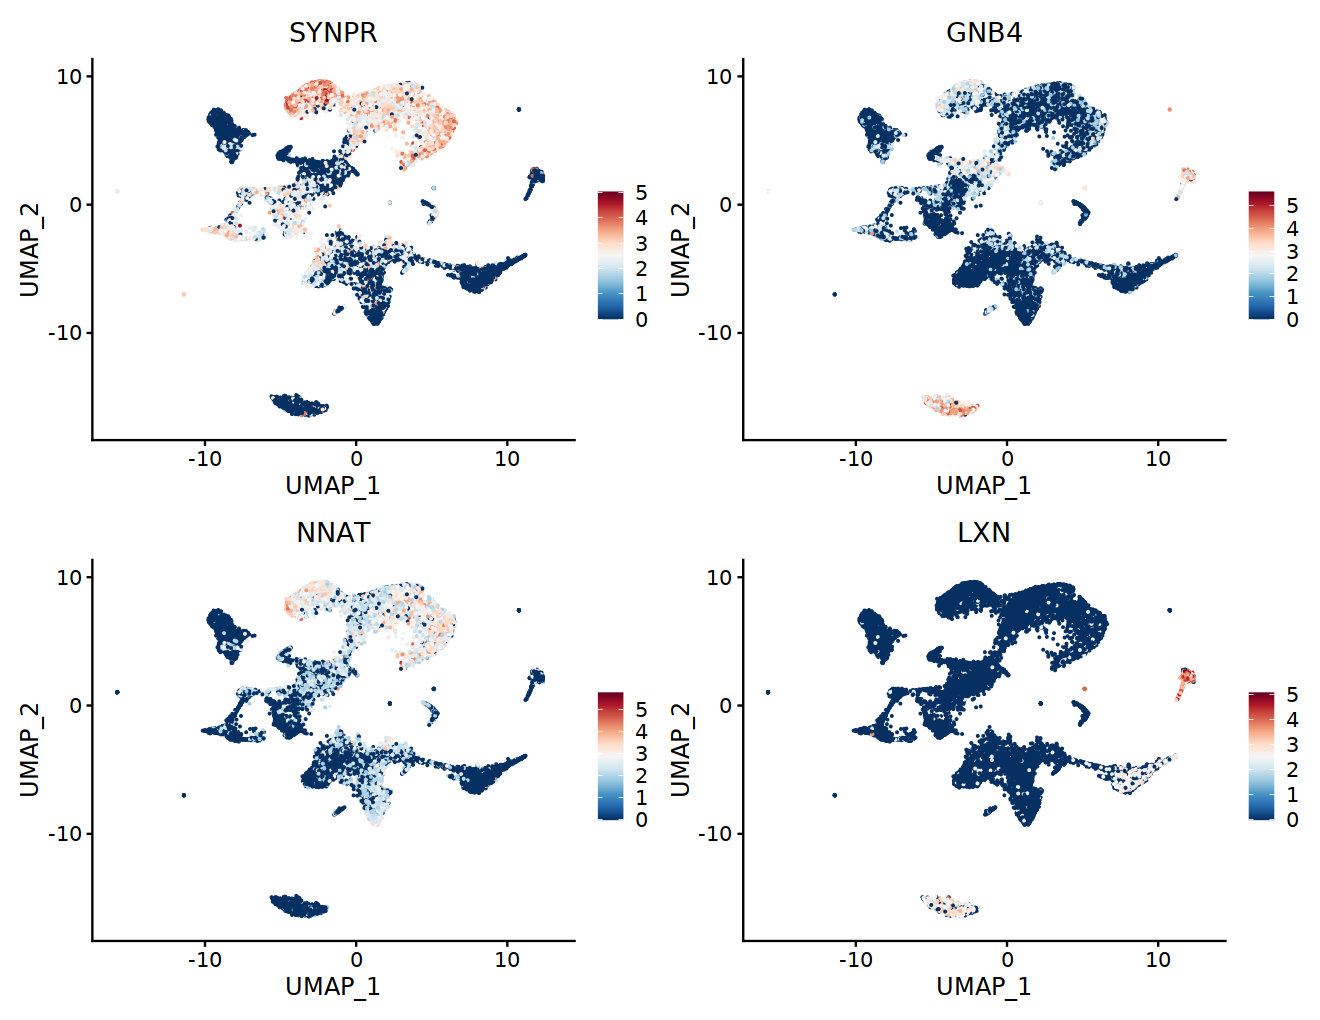

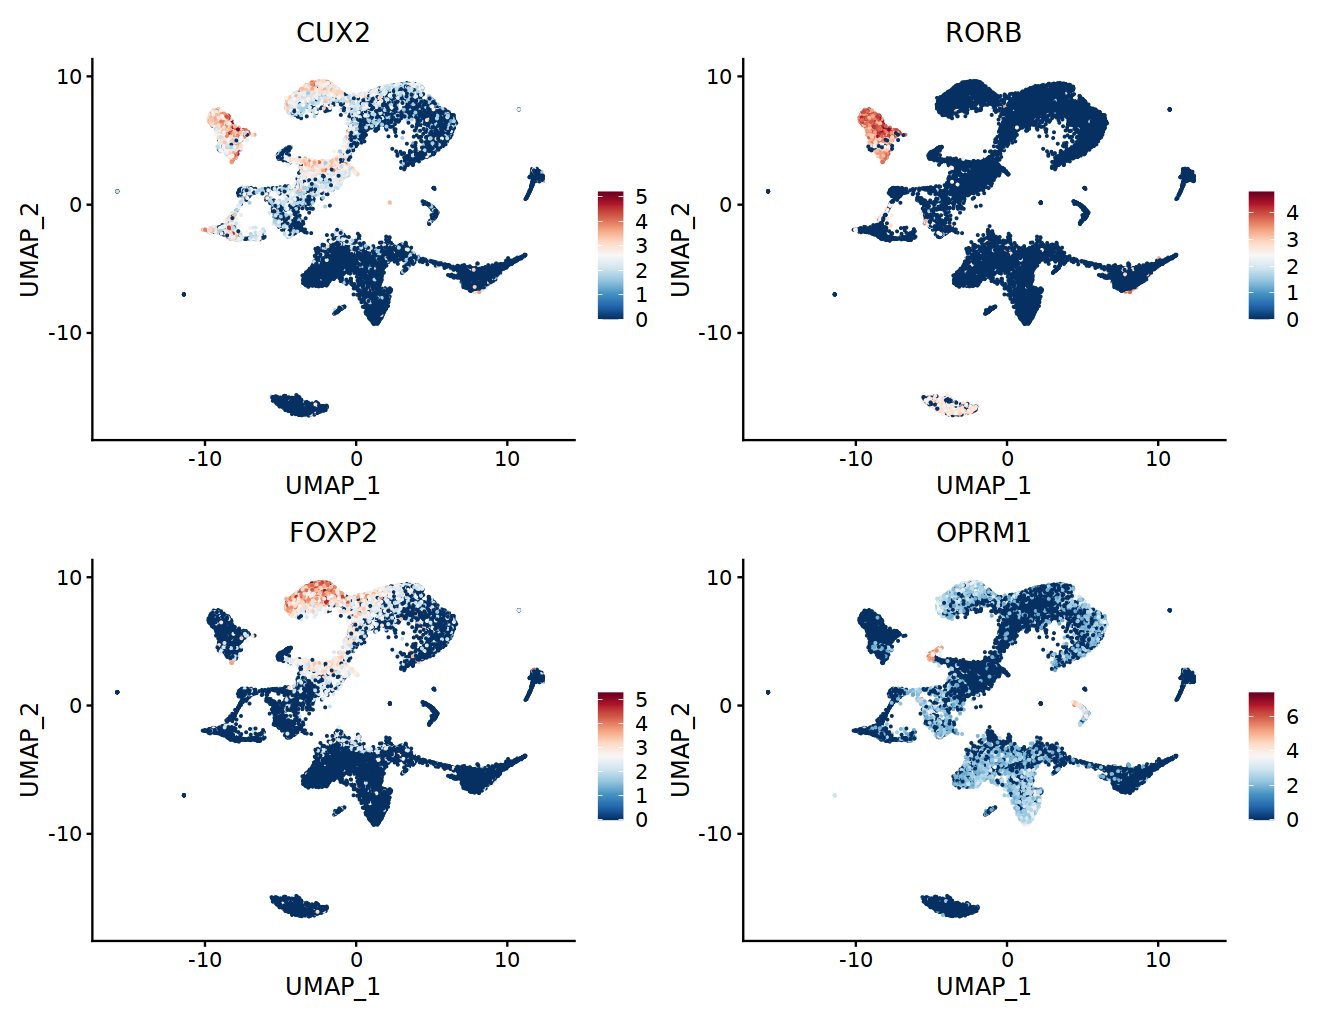

In [10]:
## mouse marker genes of the Claustrum? is this my excitatory cluster? -No it isn't
FeaturePlot(object = obj_merged, features = c('SYNPR', 'GNB4', 'NNAT', 'LXN')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

## how about upper and lower cortical excitatory layer markers -looks like upper cortical
FeaturePlot(object = obj_merged, features = c('CUX2', 'RORB', 'FOXP2', 'OPRM1')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


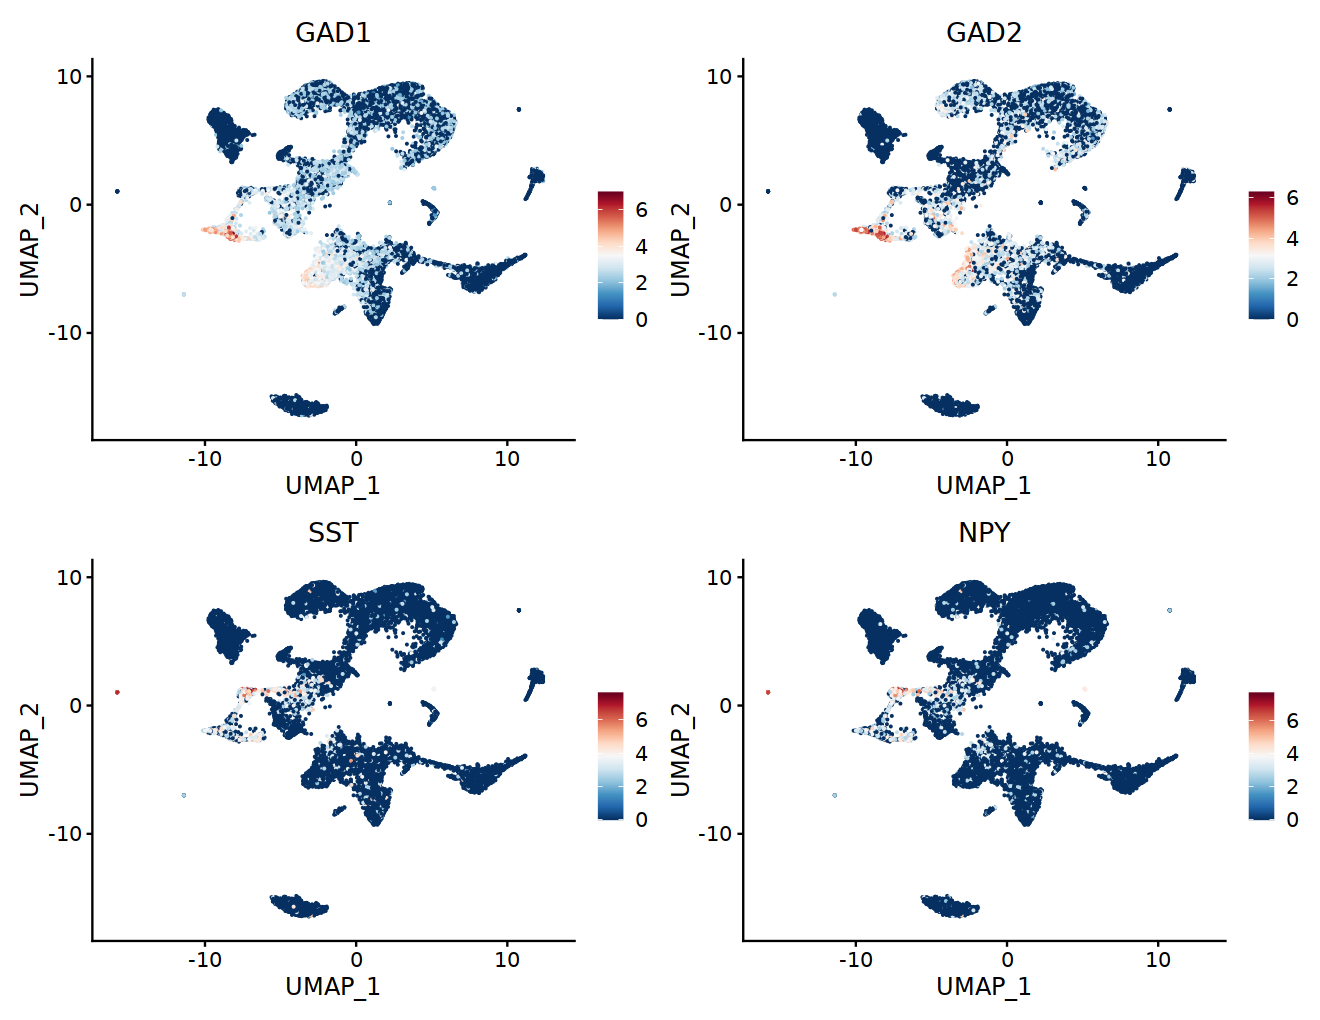

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


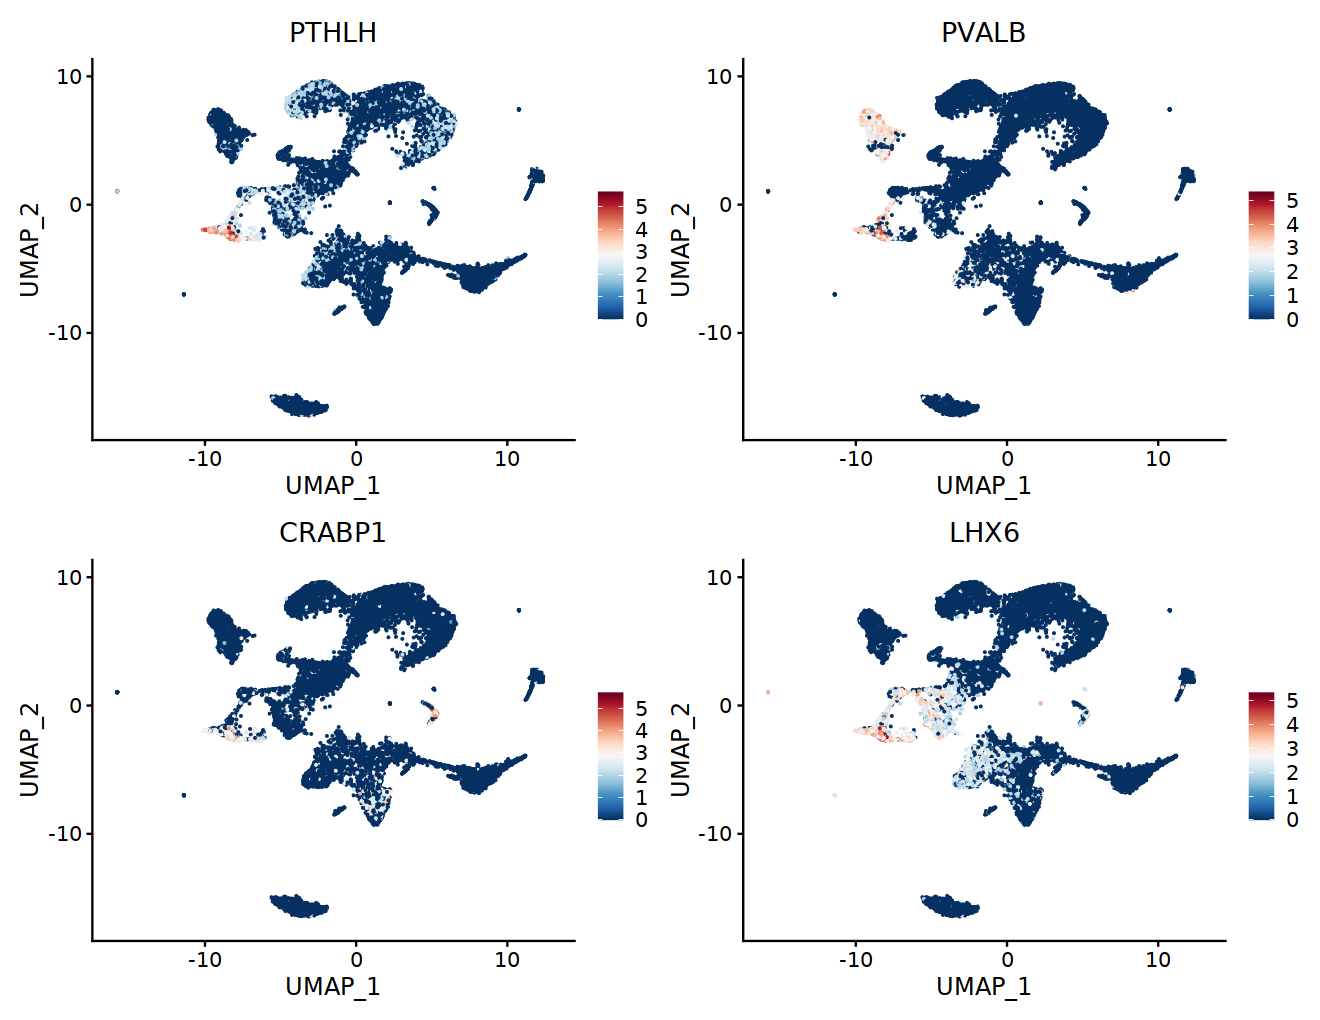

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


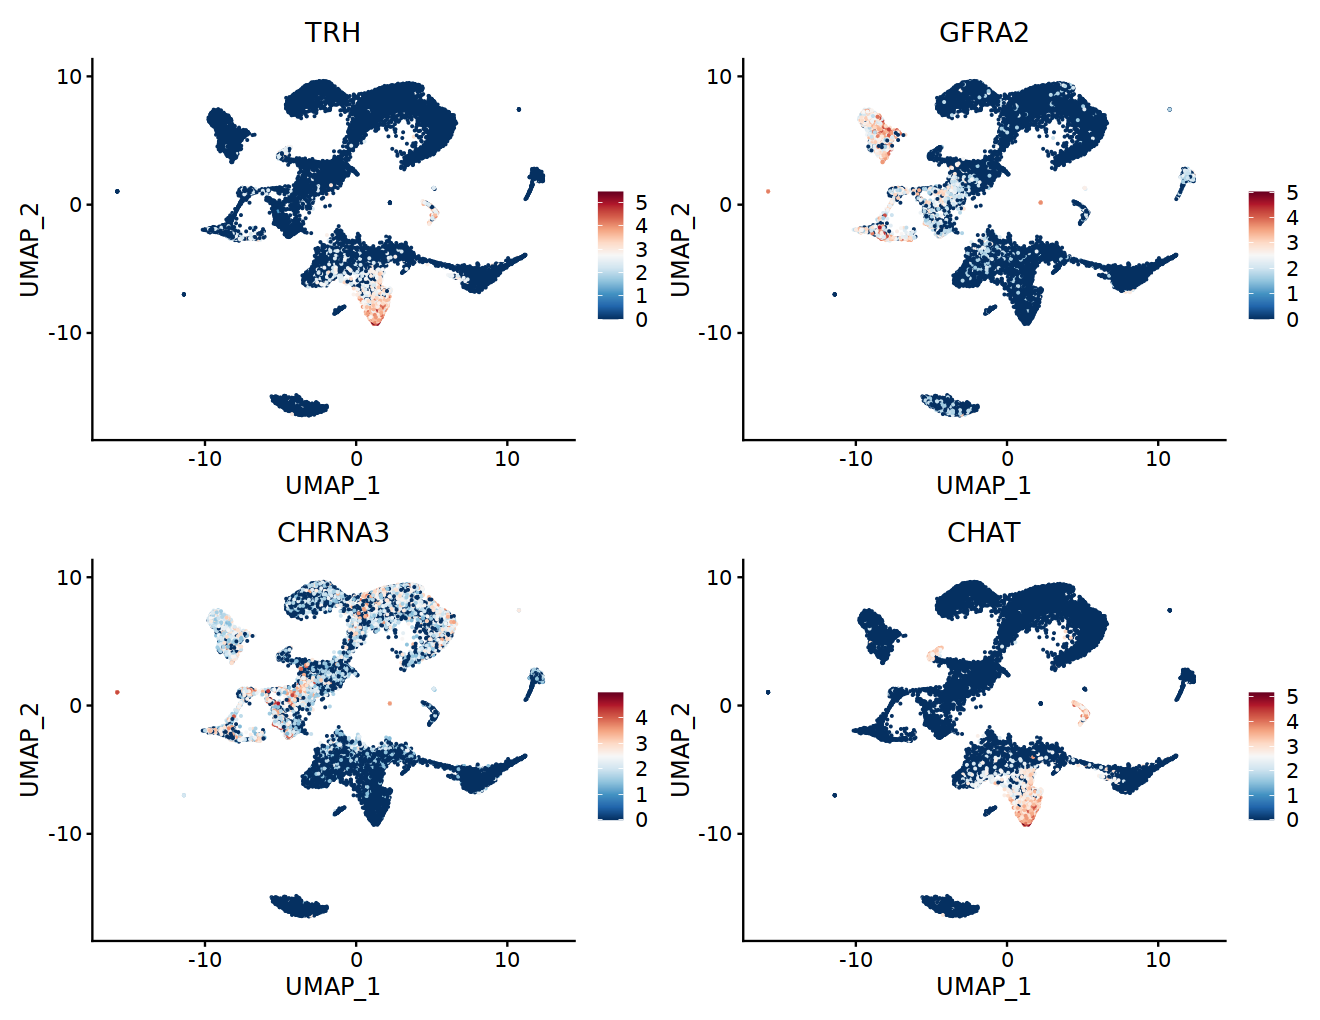

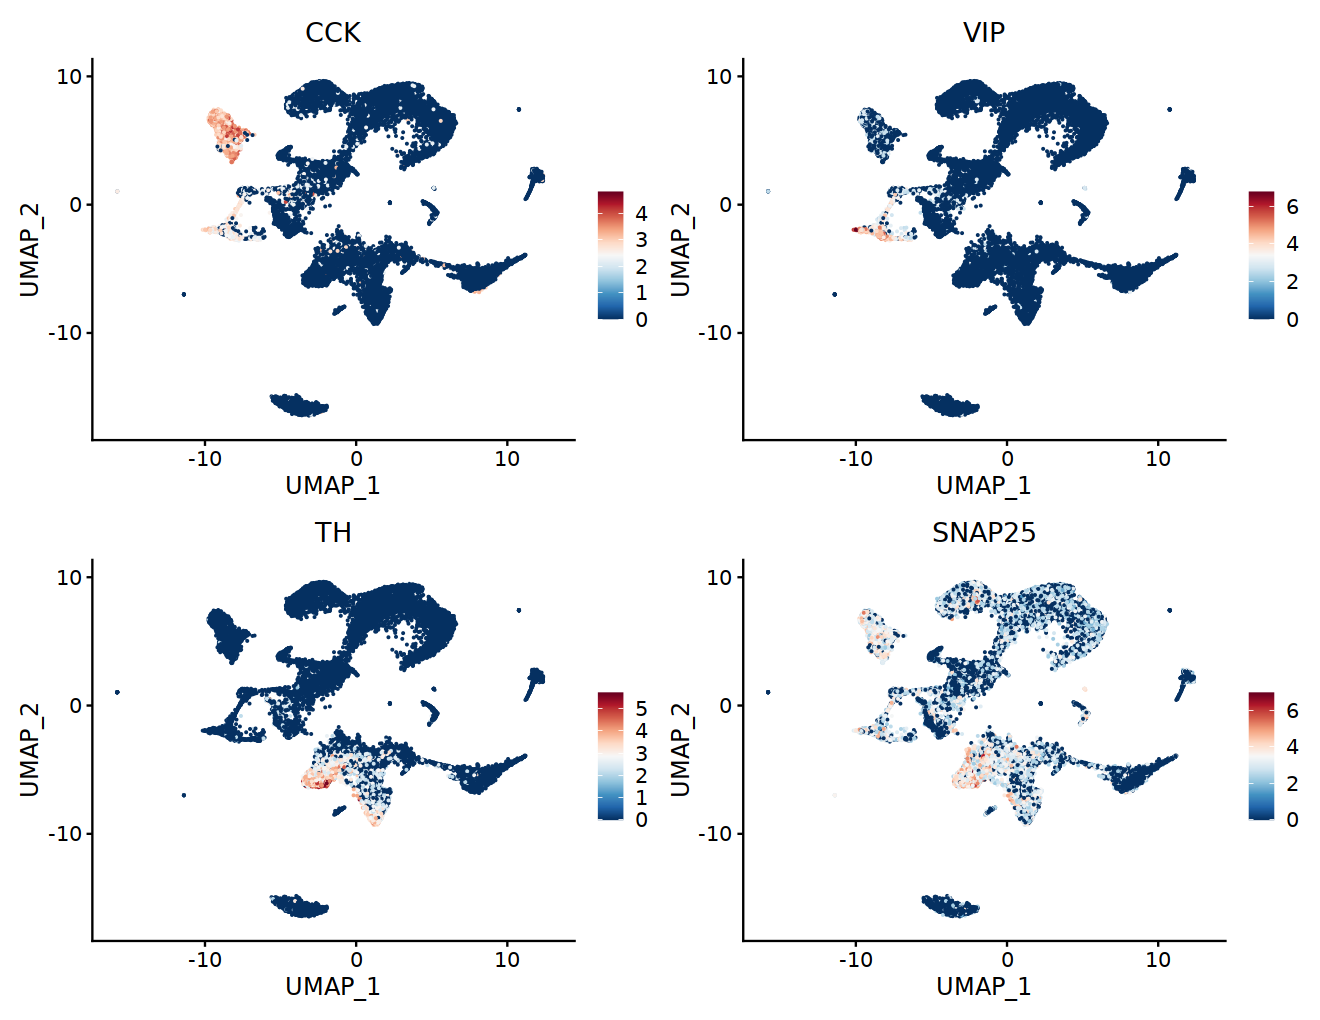

In [11]:
## how about some interneuron clusters
DefaultAssay(obj_merged) = 'alra'
FeaturePlot(object = obj_merged, features = c('GAD1', 'GAD2', 'SST', 'NPY')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

## how about some more interneuron clusters
FeaturePlot(object = obj_merged, features = c('PTHLH', 'PVALB', 'CRABP1', 'LHX6')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

## even more interneuron markers
FeaturePlot(object = obj_merged, features = c('TRH', 'GFRA2', 'CHRNA3', 'CHAT')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))


## even more interneuron markers
FeaturePlot(object = obj_merged, features = c('CCK', 'VIP', 'TH','SNAP25')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


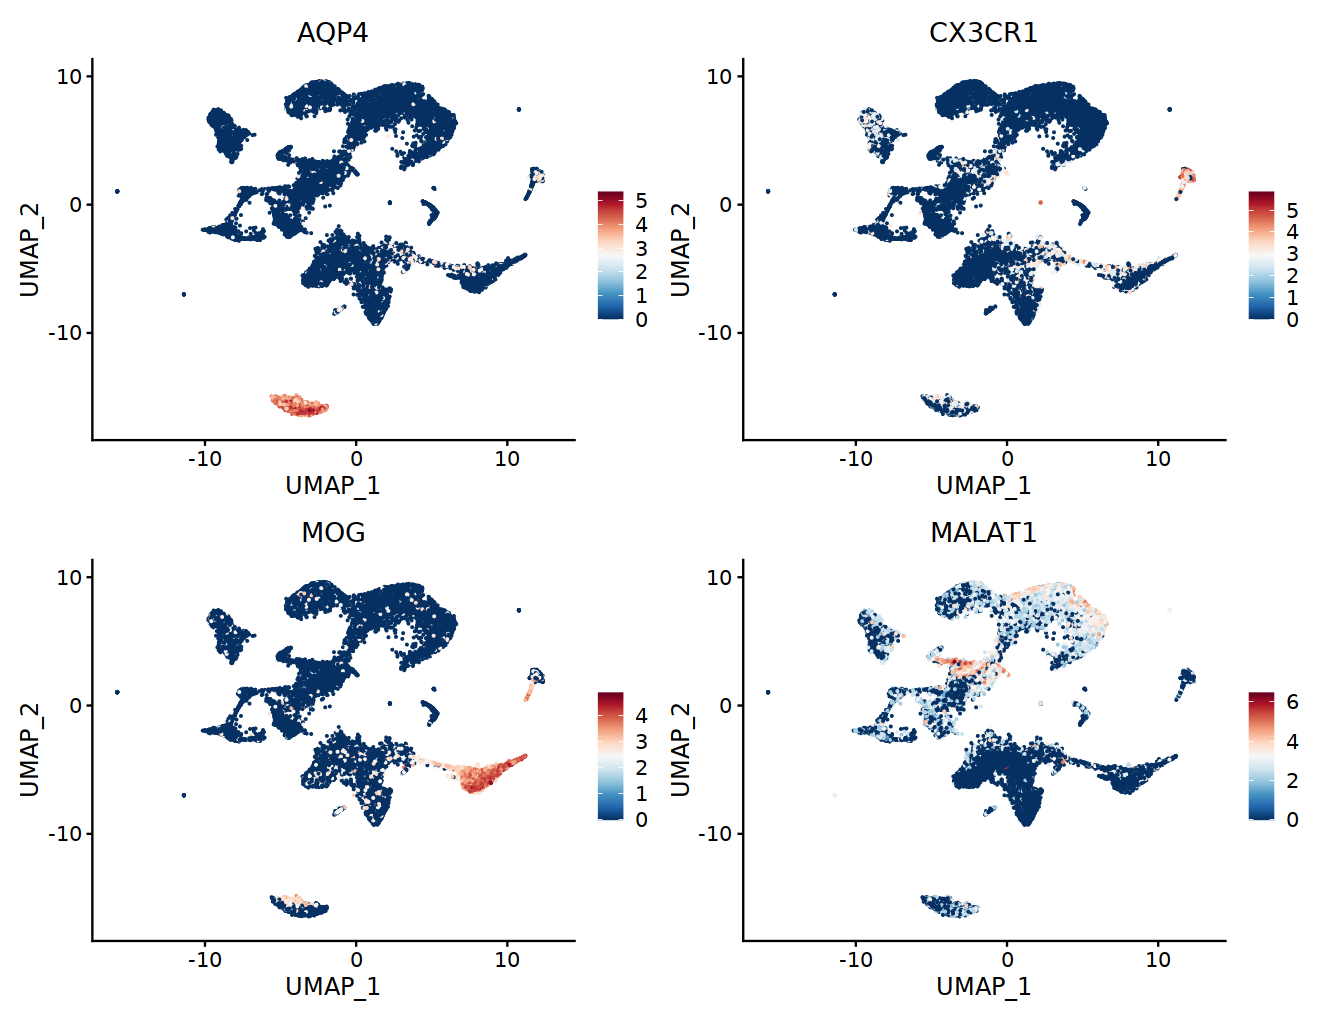

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


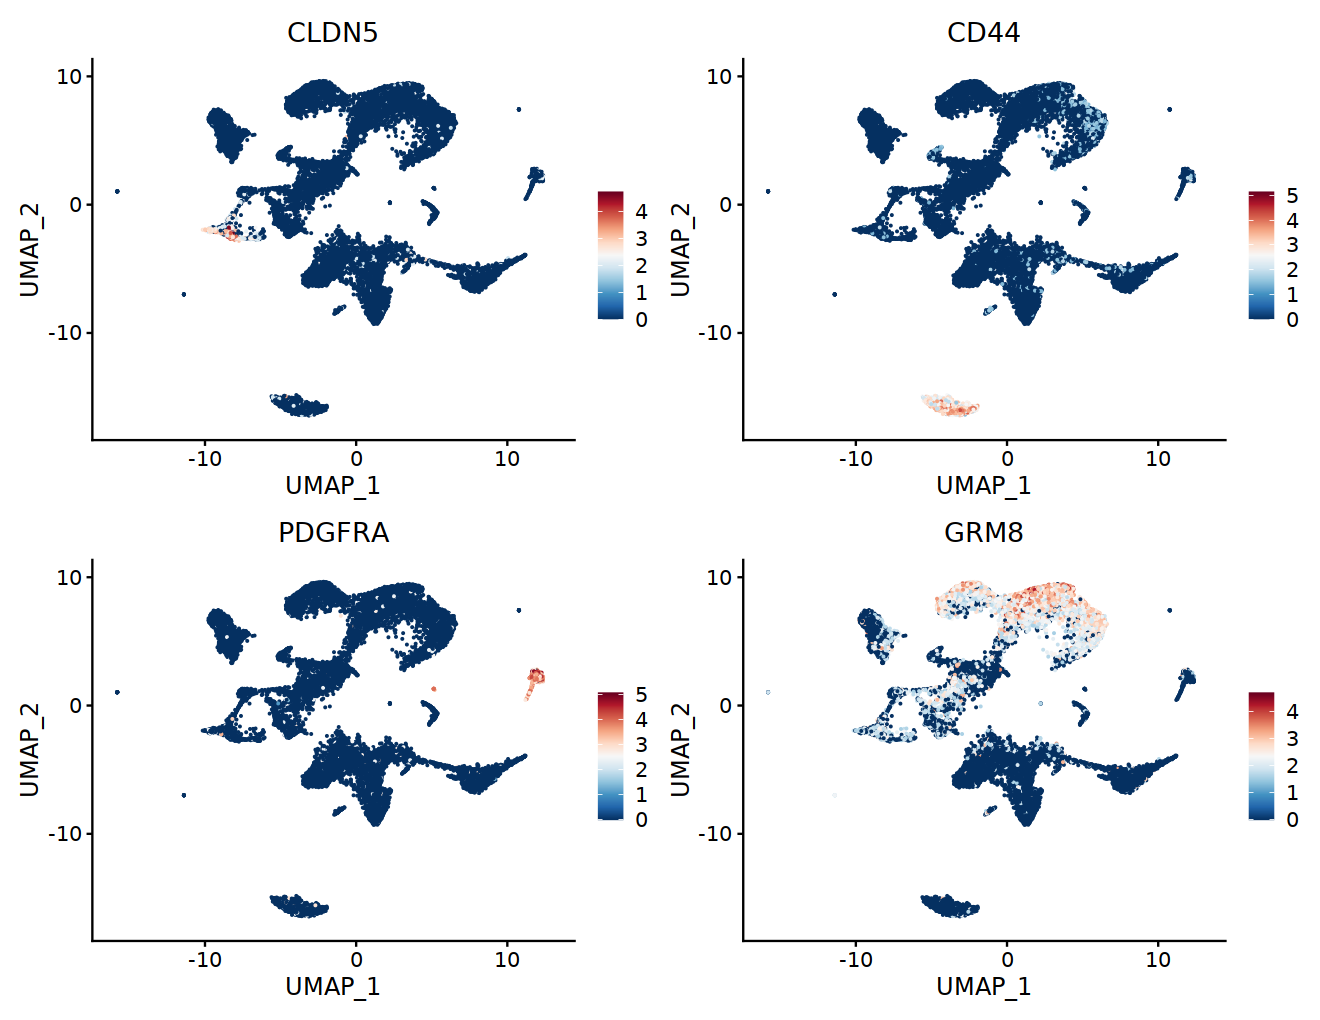

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


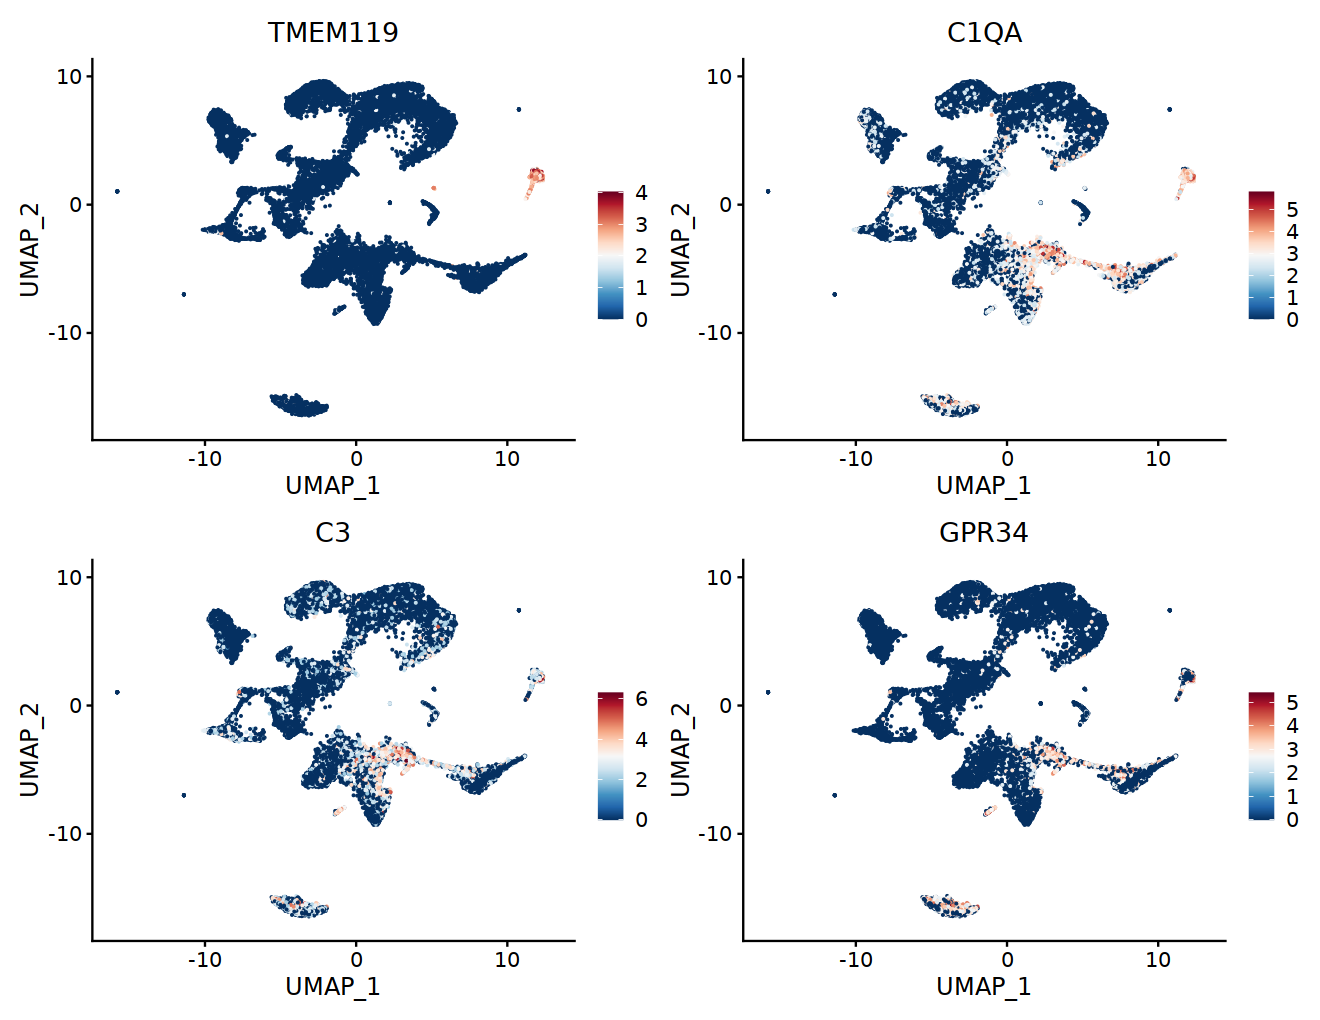

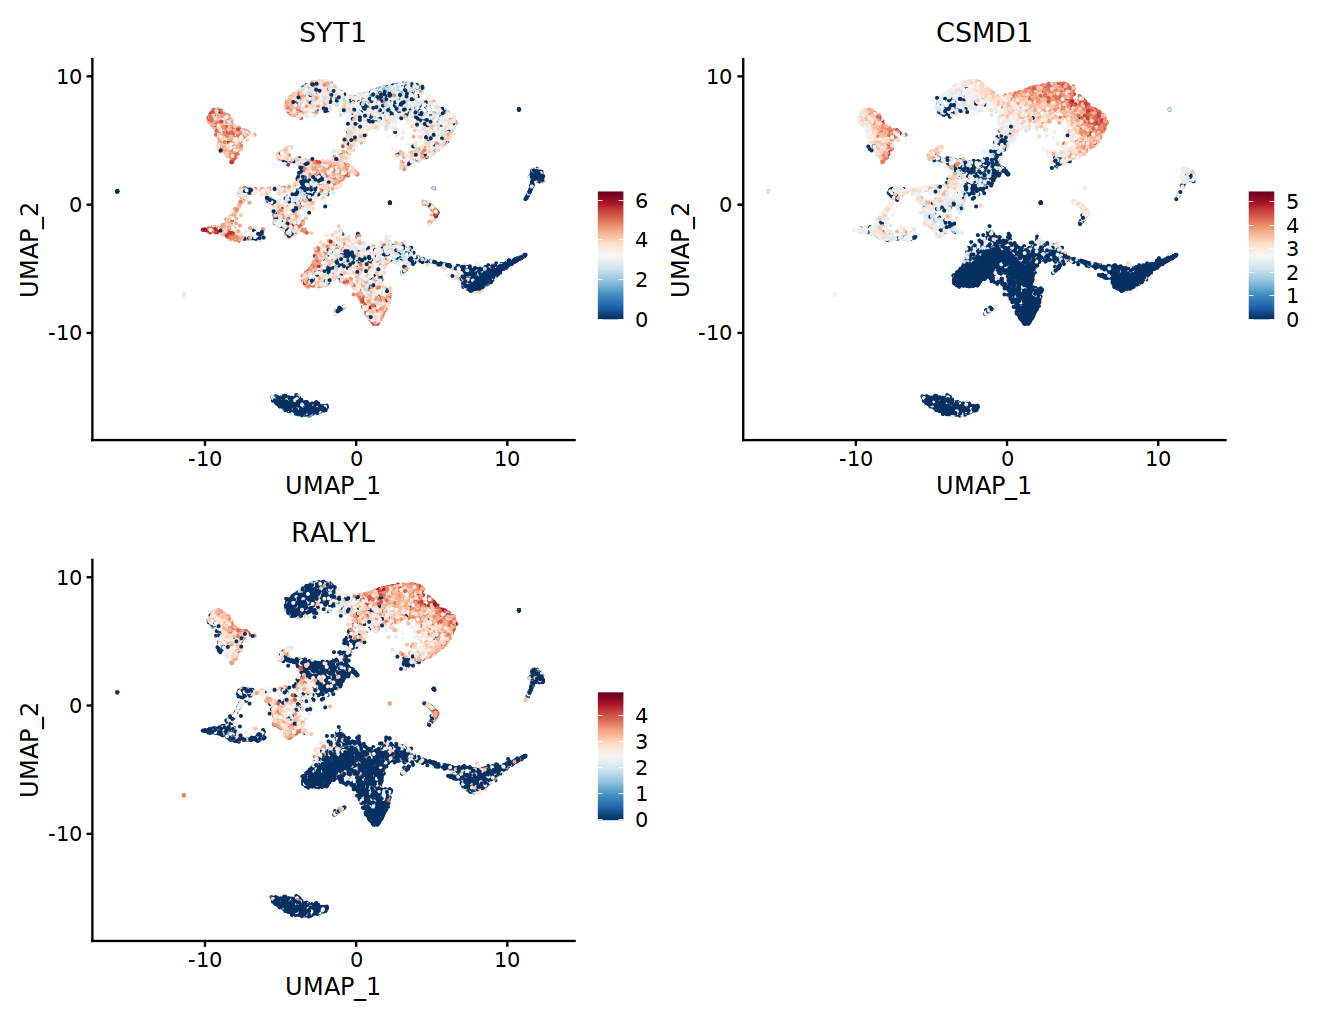

In [12]:
## how about some main glia markers
FeaturePlot(object = obj_merged, features = c('AQP4', 'CX3CR1', 'MOG', 'MALAT1')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

## how about some other glia markers
FeaturePlot(object = obj_merged, features = c('CLDN5', 'CD44', 'PDGFRA', 'GRM8')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

## how about some other microglia markers
FeaturePlot(object = obj_merged, features = c('TMEM119', 'C1QA', 'C3', 'GPR34')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

## Ambient RNA marker genes, https://www.sciencedirect.com/science/article/pii/S0896627322008157
FeaturePlot(object = obj_merged, features = c('SYT1', 'CSMD1', 'RALYL')) & 
  scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))

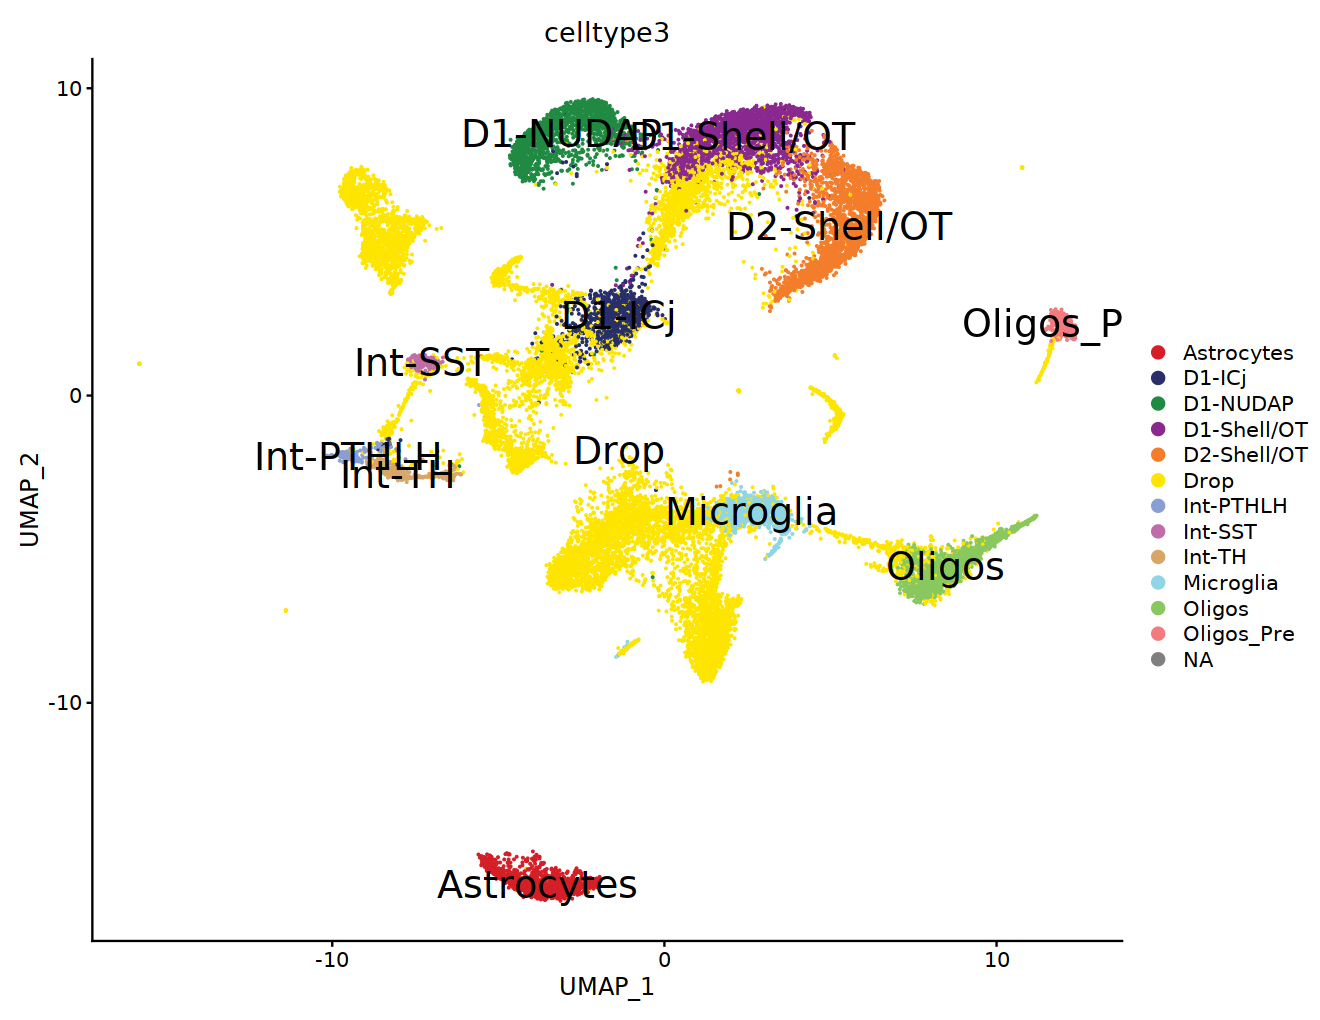

In [13]:
## using the UMAP embedding and majority clusters, relabel the rest of the cell types
obj_merged@meta.data$celltype3 = obj_merged$celltype2

## the neurons
obj_merged@meta.data$celltype3 = obj_msn[['celltype3']][colnames(obj_merged),]

## interneurons
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(30)] = 'Int-PTHLH'
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(26)] = 'Int-TH'
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(29)] = 'Int-SST'

## recover this cluster?
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(11)] = 'D1-NUDAP'
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(18)] = 'D2-Shell/OT'

## the glia
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(1)] = 'Astrocytes'
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(8)] = 'Microglia'

obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(6,  16)] = 'Oligos'
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% c(21)] = 'Oligos_Pre'

## all of these clusters have hallmarks of ambient RNA contamination
obj_merged@meta.data$celltype3[obj_merged$seurat_clusters %in% 
                               c(2,3,7,9, 5, 12:14,20,22:24, 27, 28, 31:38)] = 'Drop'

## visualize the cluster assignments
DimPlot(obj_merged, reduction = "umap", group.by = "celltype3", label = TRUE, label.size = 8, 
        cols = ArchR::paletteDiscrete(unique(obj_merged$celltype3)))

In [25]:
DefaultAssay(obj_merged) = 'integrated'
obj_merged2 = obj_merged %>% 
    subset(subset = celltype3 != 'Drop' &  !is.na(celltype3)) %>% 
    RunPCA(verbose = FALSE) %>% 
    FindNeighbors(dims = 1:30, verbose = FALSE) %>%
    RunUMAP(dims = 1:30, verbose = FALSE)


 Astrocytes      D1-ICj    D1-NUDAP D1-Shell/OT D2-Shell/OT   Int-PTHLH 
       1434        1019        1596        2118        2110         210 
    Int-SST      Int-TH   Microglia      Oligos  Oligos_Pre 
        268         405         912        1624         475 

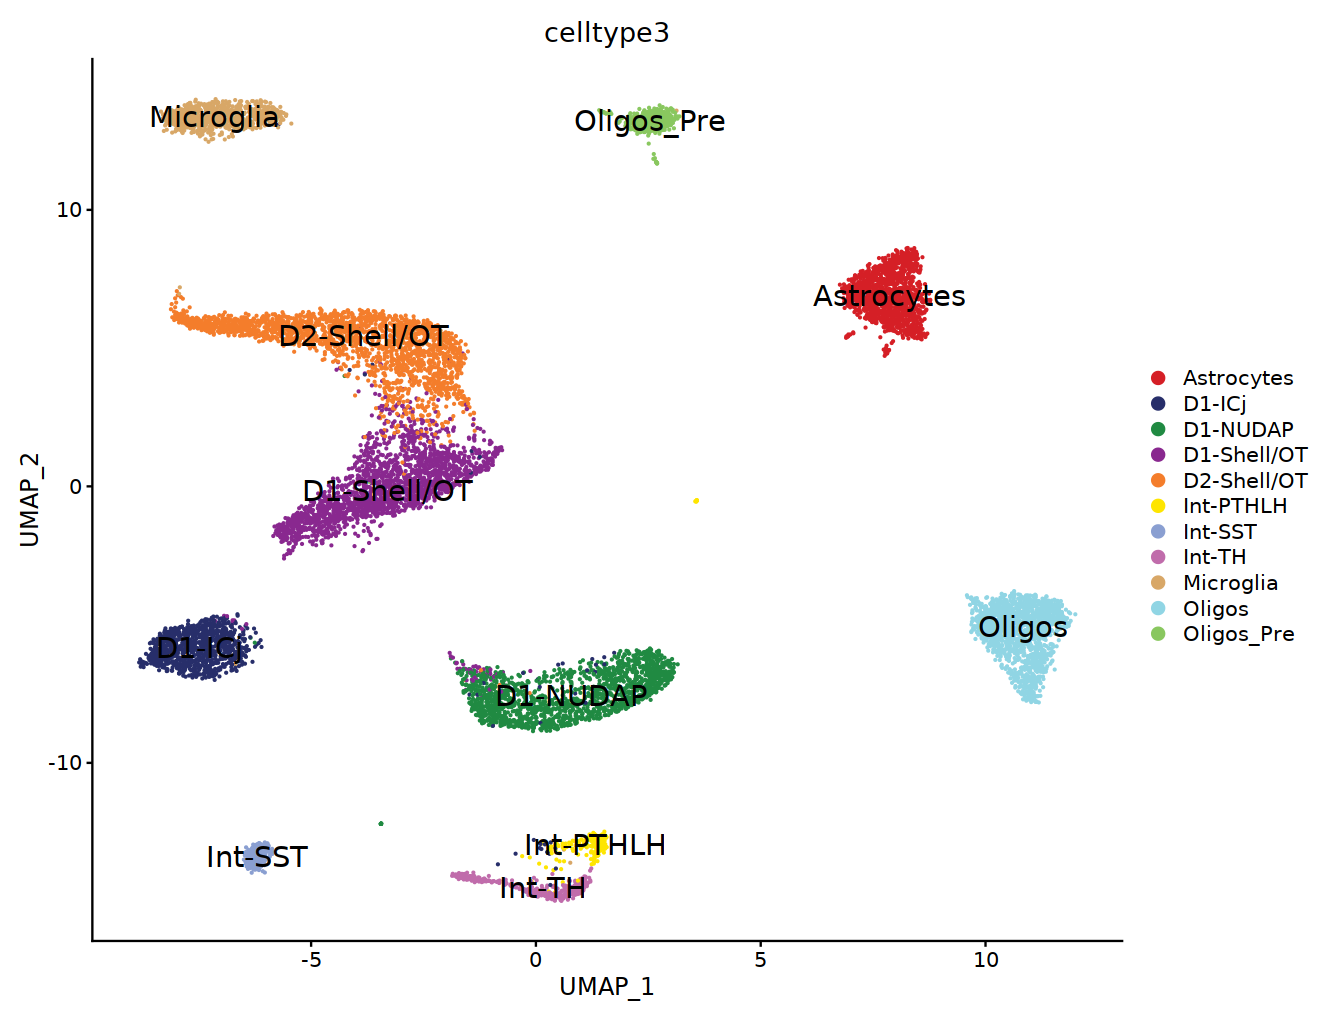

In [26]:
## visualize the refined cluster assignments w/ interneuron subtypes
table(obj_merged2$celltype3)
DimPlot(obj_merged2, reduction = "umap", group.by = "celltype3", label = TRUE, label.size =6, 
                cols = ArchR::paletteDiscrete(unique(obj_merged2$celltype3)))

In [27]:
msn_type = grep('^D', obj_merged$celltype3, value = T) %>% unique()
obj_msn2 = obj_merged2 %>% 
    subset(subset = celltype3 %in% msn_type) %>% 
    RunPCA(verbose = FALSE) %>% 
    FindNeighbors(dims = 1:30, verbose = FALSE) %>%
    RunUMAP(dims = 1:30, verbose = FALSE)


     D1-ICj    D1-NUDAP D1-Shell/OT D2-Shell/OT 
       1019        1596        2118        2110 

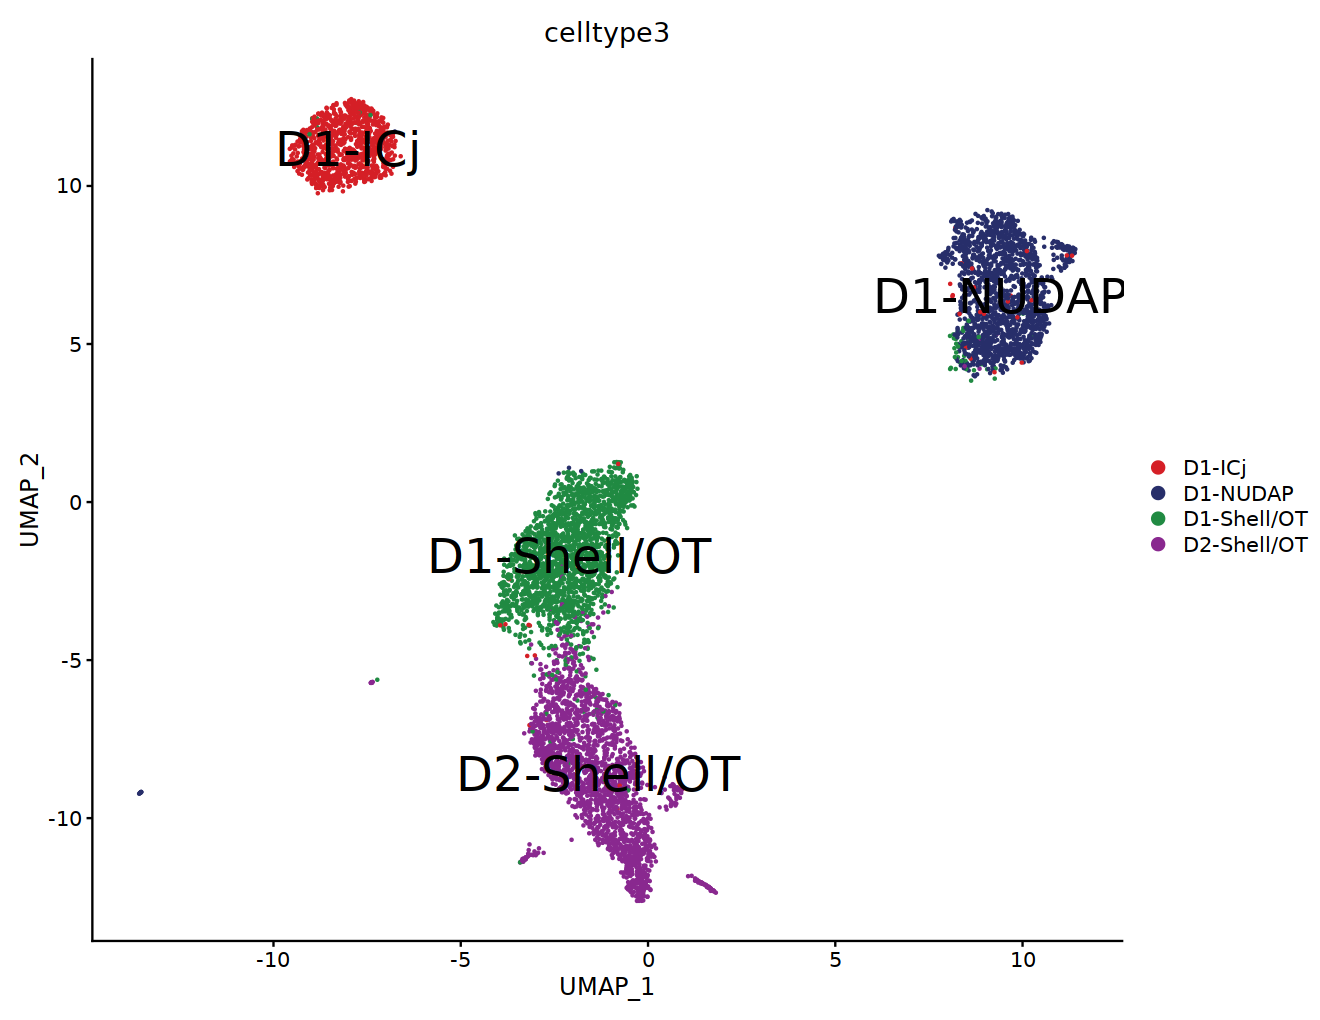

In [23]:
## visualize the refined cluster assignments
table(obj_msn2$celltype3)
DimPlot(obj_msn2, reduction = "umap", group.by = "celltype3", label = TRUE, label.size = 10, 
                cols = ArchR::paletteDiscrete(unique(obj_msn2$celltype3)))

In [30]:
celltypes =  c("D1-Shell/OT", "D1-NUDAP", "D1-ICj", "D2-Shell/OT", 
               "Int-PTHLH", "Int-SST" , 'Int-TH', 
               "Astrocytes", "Microglia", "Oligos", "Oligos_Pre")
Idents(obj_merged2) <- "celltype3"
levels(obj_merged2) <- celltypes
table(Idents(obj_merged2))


D1-Shell/OT    D1-NUDAP      D1-ICj D2-Shell/OT   Int-PTHLH     Int-SST 
       2118        1596        1019        2110         210         268 
     Int-TH  Astrocytes   Microglia      Oligos  Oligos_Pre 
        405        1434         912        1624         475 

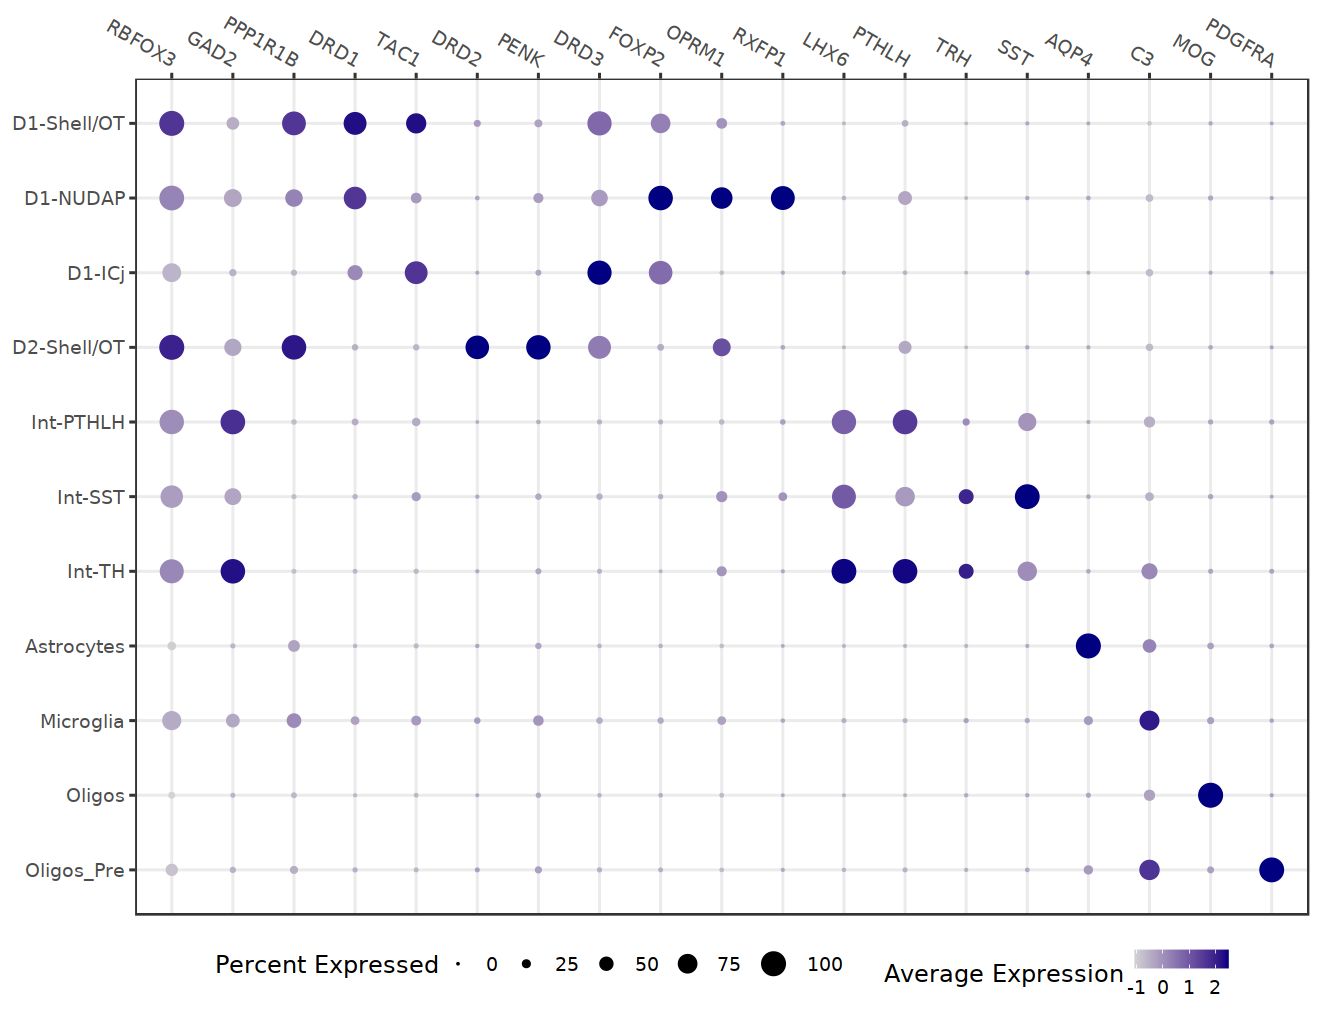

In [35]:
markerGenes = c(
  'RBFOX3', # NeuN-neurons'
  'GAD2', # Gaba-ergic neurons
  'PPP1R1B', # DARPP-32 MSNs
  'DRD1', # direct MSNs
  'TAC1', # direct MSNs
  'DRD2',  # indirect MSNs
  'PENK',  # indirect MSNs
  'DRD3', # ICj 
  'FOXP2', # NUDAP/ D1/D2H
  'OPRM1', # NUDAP
  'RXFP1', # NUDAP/ D1/D2H
  'LHX6', # MGE interneurons
  'PTHLH', # MGE interneurons
  'TRH', # MGE interneurons
  'SST', # MGE interneurons
  'AQP4', # Astrocytes
  'C3', # Microglia
  'MOG', # Oligodendrocyte
  'PDGFRA' # OPC
  )

DotPlot( obj_merged2, features = markerGenes, cols = c('lightgray', 'navyblue'),
  cluster.idents = F, scale = T, scale.by = "radius", assay = 'alra') +
  theme_bw(base_size = 14) + scale_y_discrete(limits = rev) +
  scale_x_discrete(position = "top") +
  theme(legend.position = 'bottom', plot.title= element_blank(),
        axis.text.x = element_text(angle = -30, vjust = 0, hjust=1),
        axis.title = element_blank(), 
        legend.key.size = unit(4, "mm"),
        legend.spacing.x = unit(4, 'mm'))

In [34]:
################################
# 6) save the refined clusters

## export the metadata
save_meta_fn = here('data/tidy_data/tables',"OUD_Striatum_refined_all_SeuratObj_N16.txt.gz")
write_tsv(obj_merged2@meta.data, save_meta_fn)

## save in the MSN dataset for label refinement
save_subset_msn = here('data/tidy_data/Seurat_projects', 
                        "OUD_Striatum_refined_msn_SeuratObj_N16.h5Seurat")
SaveH5Seurat(obj_msn2, filename = save_subset_msn, overwrite = TRUE)

## save in the full dataset for label refinement
save_merged_fn = here('data/tidy_data/Seurat_projects', 
                        "OUD_Striatum_refined_all_SeuratObj_N16.h5Seurat")
SaveH5Seurat(obj_merged2, filename = save_merged_fn, overwrite = TRUE)

Creating h5Seurat file for version 3.1.5.9900

Adding data for integrated

Adding scale.data for integrated

Adding variable features for integrated

No feature-level metadata found for integrated

Writing out SCTModel.list for integrated

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

No variable features found for SCT

No feature-level metadata found for SCT

Writing out SCTModel.list for SCT

Adding data for alra

No variable features found for alra

No feature-level metadata found for alra

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Creating h5Seurat file for version 3.1.5.9900

Adding da